In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style untuk visualisasi yang lebih menarik
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. LOAD DATA

In [ ]:
print("="*60)
print("Mining Analyst")
print("="*60)

df = pd.read_csv('mining_extraxtion_january.csv')

# Konversi month_day ke format datetime (tahun 2024)
df['date'] = pd.to_datetime('2025-' + df['month_day'], format='%Y-%m-%d')
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

print("\n📊 Preview Data:")
print(df.head(10))
print(f"\n📈 Total Records: {len(df)}")

Mining Analyst

📊 Preview Data:
  pit_id pit_name operator_name month_day  total_volume_ton  \
0  PIT05    Pit 5      Theodore     01-01            107.15   
1  PIT07    Pit 7      Benjamin     01-01            113.84   
2  PIT08    Pit 8          Levi     01-02             92.34   
3  PIT01    Pit 1          Ezra     01-03            134.81   
4  PIT03    Pit 3         Henry     01-03             64.09   
5  PIT04    Pit 4           NaN     01-03             87.61   
6  PIT08    Pit 8         Mateo     01-04             50.88   
7  PIT03    Pit 3          Levi     01-05            197.47   
8  PIT02    Pit 2        Hudson     01-06             92.92   
9  PIT06    Pit 6        Isaiah     01-06            176.57   

   average_grade_pct       date  month  day  
0               1.55 2025-01-01      1    1  
1               2.54 2025-01-01      1    1  
2               0.99 2025-01-02      1    2  
3               1.78 2025-01-03      1    3  
4               2.74 2025-01-03      1    3 

# 2. STATISTIK DESKRIPTIF

In [5]:
print("\n" + "="*60)
print("STATISTIK DESKRIPTIF")
print("="*60)

print("\n🔢 Volume (ton):")
print(f"  • Mean     : {df['total_volume_ton'].mean():.2f} ton")
print(f"  • Median   : {df['total_volume_ton'].median():.2f} ton")
print(f"  • Min      : {df['total_volume_ton'].min():.2f} ton")
print(f"  • Max      : {df['total_volume_ton'].max():.2f} ton")
print(f"  • Std Dev  : {df['total_volume_ton'].std():.2f} ton")

print("\n⚗️ Grade (%):")
print(f"  • Mean     : {df['average_grade_pct'].mean():.2f}%")
print(f"  • Median   : {df['average_grade_pct'].median():.2f}%")
print(f"  • Min      : {df['average_grade_pct'].min():.2f}%")
print(f"  • Max      : {df['average_grade_pct'].max():.2f}%")
print(f"  • Std Dev  : {df['average_grade_pct'].std():.2f}%")


STATISTIK DESKRIPTIF

🔢 Volume (ton):
  • Mean     : 124.21 ton
  • Median   : 117.52 ton
  • Min      : 34.14 ton
  • Max      : 219.93 ton
  • Std Dev  : 55.93 ton

⚗️ Grade (%):
  • Mean     : 1.76%
  • Median   : 1.82%
  • Min      : 0.61%
  • Max      : 2.77%
  • Std Dev  : 0.62%


# 3. ANALISIS PER PIT

In [7]:
print("\n" + "="*60)
print("ANALISIS PER PIT")
print("="*60)

pit_analysis = df.groupby('pit_name').agg({
    'total_volume_ton': ['sum', 'mean', 'count'],
    'average_grade_pct': 'mean'
}).round(2)

pit_analysis.columns = ['Total Volume', 'Avg Volume', 'Jumlah Operasi', 'Avg Grade']
print("\n", pit_analysis.sort_values('Total Volume', ascending=False))


ANALISIS PER PIT

           Total Volume  Avg Volume  Jumlah Operasi  Avg Grade
pit_name                                                     
Pit 4          1946.14      121.63              16       1.63
Pit 8          1919.10      119.94              16       1.68
Pit 2          1820.80      151.73              12       1.72
Pit 6          1444.82      144.48              10       1.62
Pit 1          1400.04      140.00              10       2.04
Pit 7          1294.14       99.55              13       1.84
Pit 5          1187.74       98.98              12       1.54
Pit 3          1035.25      129.41               8       2.23


# 4. ANALISIS PER OPERATOR

In [8]:
print("\n" + "="*60)
print("ANALISIS PER OPERATOR")
print("="*60)

operator_analysis = df.groupby('operator_name').agg({
    'total_volume_ton': ['sum', 'mean'],
    'average_grade_pct': 'mean'
}).round(2)

operator_analysis.columns = ['Total Volume', 'Avg Volume', 'Avg Grade']
print("\n", operator_analysis.sort_values('Total Volume', ascending=False))


ANALISIS PER OPERATOR

                Total Volume  Avg Volume  Avg Grade
operator_name                                     
Isaiah               994.27      165.71       1.25
James                822.88      117.55       1.89
Noah                 758.22      189.56       2.30
Lucas                731.86      182.96       2.02
Bodhi                702.59      175.65       1.68
Julian               687.84      137.57       1.89
Oliver               575.84      115.17       1.35
Logan                543.64      108.73       1.56
Benjamin             480.27       96.05       1.74
Henry                396.26       99.06       2.15
Caleb                387.25      193.62       0.91
Ezra                 386.83      128.94       2.40
Levi                 379.27      126.42       1.32
Mateo                377.27      125.76       1.50
Theodore             367.94      122.65       1.99
Maverick             361.00       90.25       1.59
Asher                346.35      115.45       1.47
Ethan 

# 5. VISUALISASI

### == GRAFIK 1: TREND HARIAN (Full Screen) ==

C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\2284721312.py:78: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\2284721312.py:78: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\2284721312.py:78: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\2284721312.py:79: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig('1_trend_volume_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\2284721312.py:79: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig('1_trend_volume_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Pers


✅ Grafik 1 disimpan: '1_trend_volume_harian_HD.png'


c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


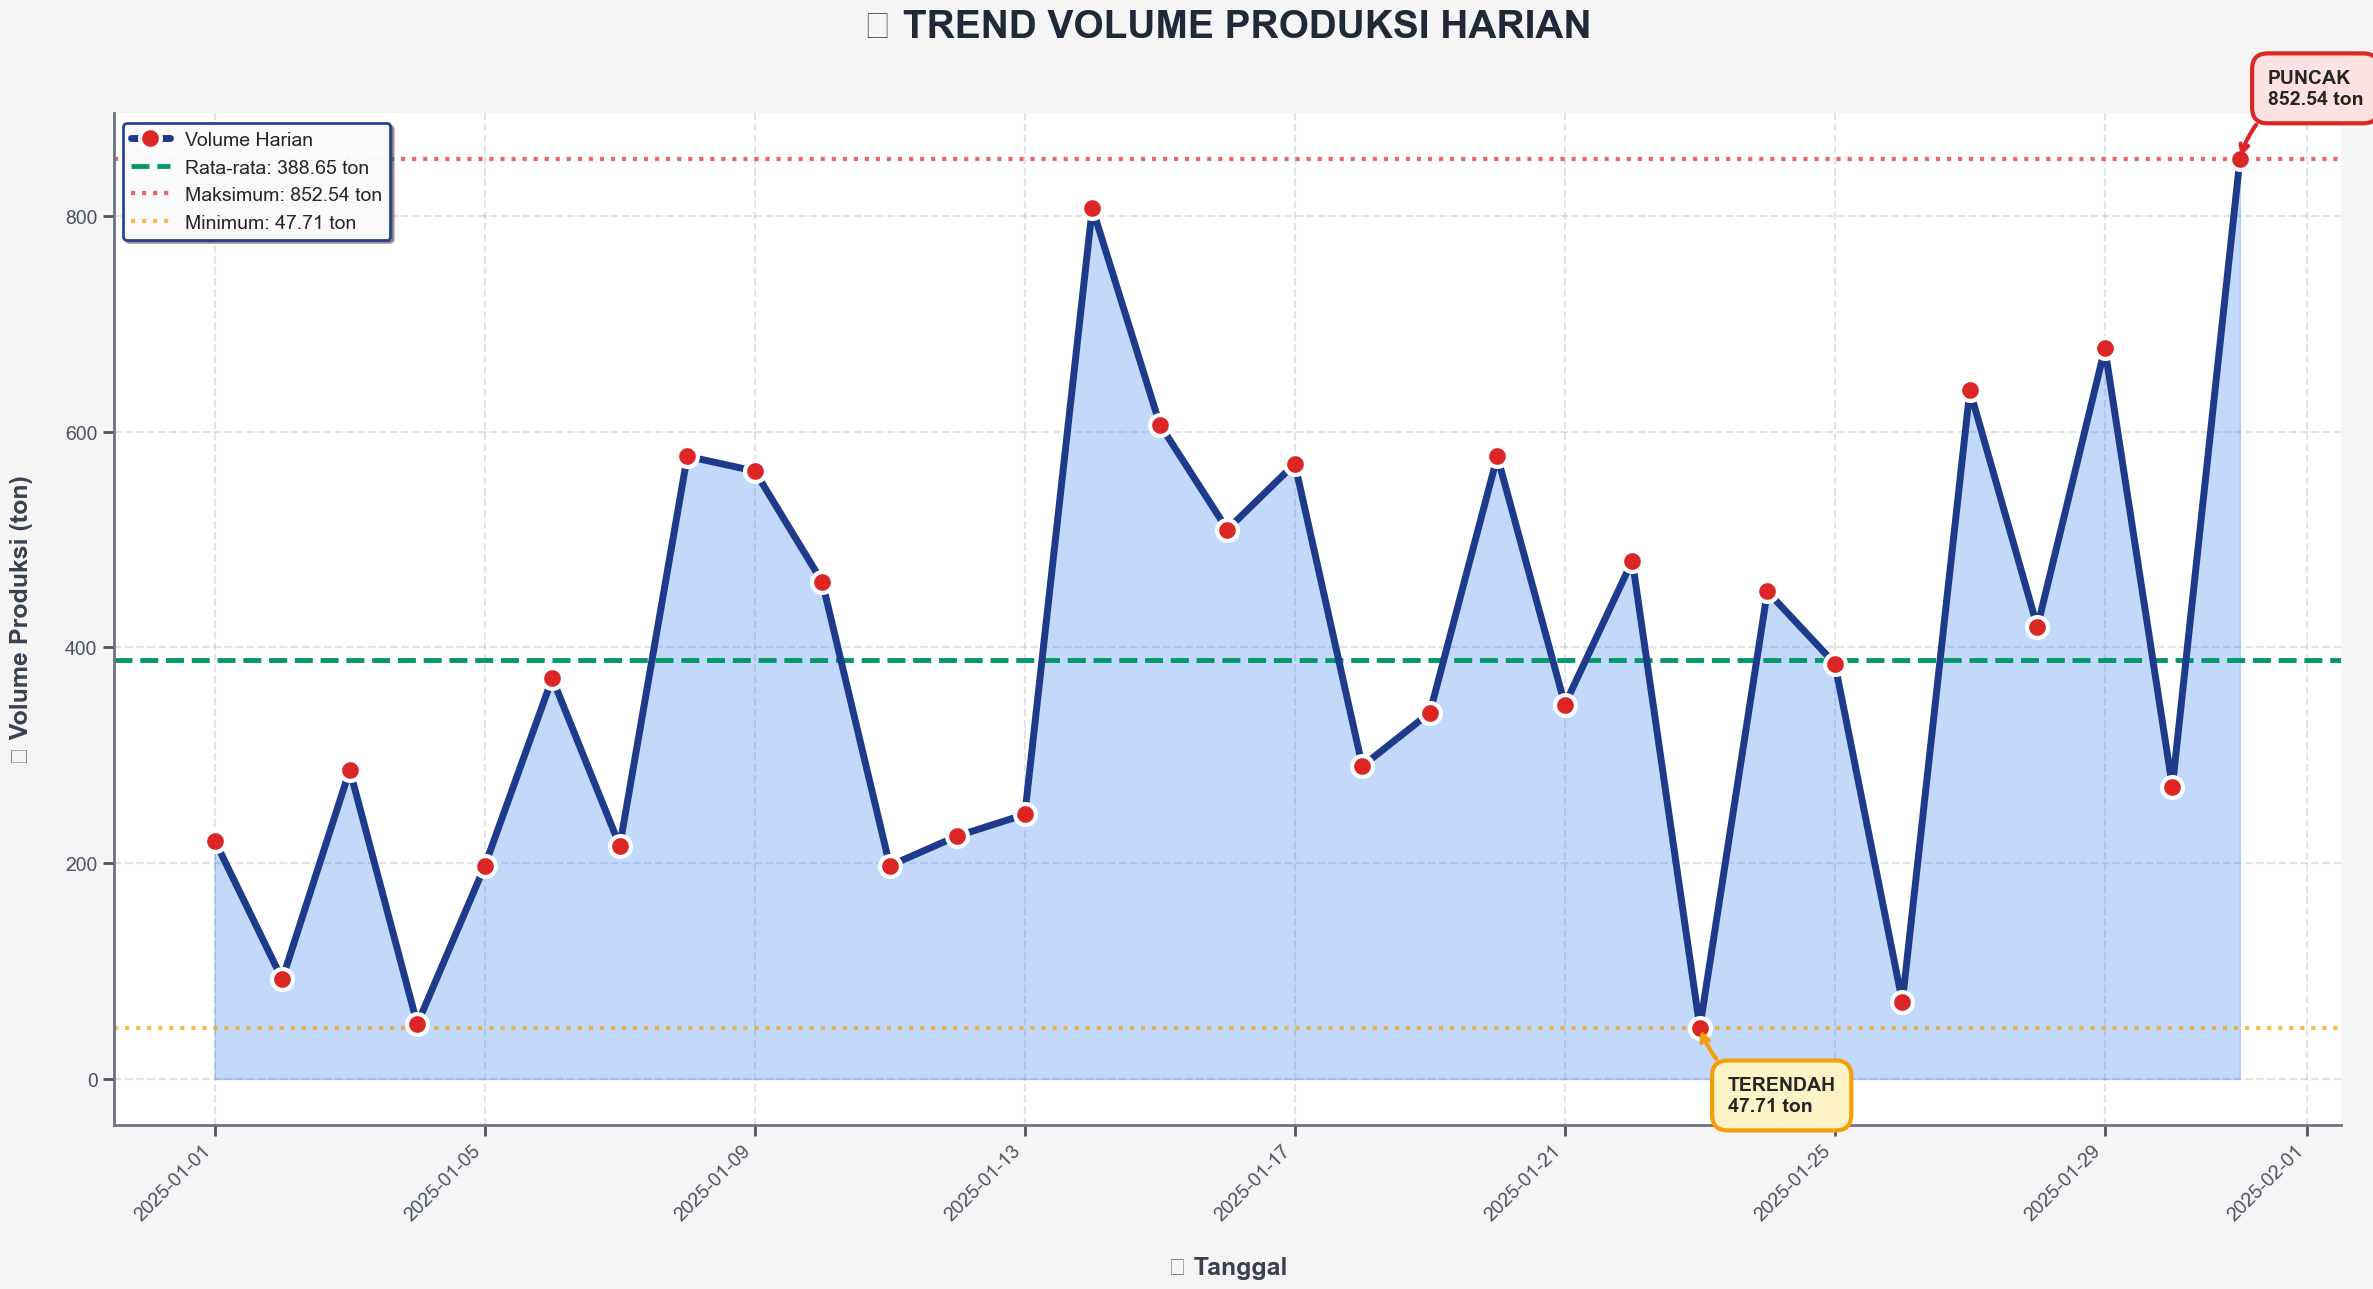

In [25]:
fig1 = plt.figure(figsize=(24, 13))
fig1.patch.set_facecolor('#F5F5F5')

daily_volume = df.groupby('date')['total_volume_ton'].sum().sort_index()

ax1 = plt.subplot(1, 1, 1)
ax1.set_facecolor('#FFFFFF')

# Plot line dengan gradient effect
ax1.plot(daily_volume.index, daily_volume.values, 
         marker='o', linewidth=5, markersize=15, 
         color='#1E3A8A', markerfacecolor='#DC2626', 
         markeredgecolor='white', markeredgewidth=3,
         label='Volume Harian', zorder=3)

# Fill area dengan gradient
ax1.fill_between(daily_volume.index, daily_volume.values, 
                 alpha=0.3, color='#3B82F6', zorder=1)

# Tambahkan garis mean dan max
mean_val = daily_volume.mean()
max_val = daily_volume.max()
min_val = daily_volume.min()

ax1.axhline(y=mean_val, color='#059669', linestyle='--', linewidth=3.5, 
            label=f'Rata-rata: {mean_val:.2f} ton', zorder=2)
ax1.axhline(y=max_val, color='#DC2626', linestyle=':', linewidth=3, 
            label=f'Maksimum: {max_val:.2f} ton', alpha=0.7, zorder=2)
ax1.axhline(y=min_val, color='#F59E0B', linestyle=':', linewidth=3, 
            label=f'Minimum: {min_val:.2f} ton', alpha=0.7, zorder=2)

# Anotasi untuk nilai tertinggi
max_idx = daily_volume.idxmax()
ax1.annotate(f'PUNCAK\n{max_val:.2f} ton', 
             xy=(max_idx, max_val), 
             xytext=(20, 40), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#FEE2E2', 
                      edgecolor='#DC2626', linewidth=3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                           color='#DC2626', linewidth=3),
             fontsize=14, fontweight='bold', ha='left')

# Anotasi untuk nilai terendah
min_idx = daily_volume.idxmin()
ax1.annotate(f'TERENDAH\n{min_val:.2f} ton', 
             xy=(min_idx, min_val), 
             xytext=(20, -60), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#FEF3C7', 
                      edgecolor='#F59E0B', linewidth=3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.3',
                           color='#F59E0B', linewidth=3),
             fontsize=14, fontweight='bold', ha='left')

# Title dan labels
ax1.set_title('📈 TREND VOLUME PRODUKSI HARIAN\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax1.set_xlabel('\n📅 Tanggal', fontsize=18, fontweight='bold', color='#374151')
ax1.set_ylabel('📦 Volume Produksi (ton)\n', fontsize=18, fontweight='bold', color='#374151')

# Styling
ax1.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, color='#9CA3AF')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('#6B7280')
ax1.spines['bottom'].set_color('#6B7280')

# Legend
legend = ax1.legend(loc='upper left', frameon=True, fontsize=14, 
                    fancybox=True, shadow=True, framealpha=0.95)
legend.get_frame().set_facecolor('#FFFFFF')
legend.get_frame().set_edgecolor('#1E3A8A')
legend.get_frame().set_linewidth(2)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('1_trend_volume_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("\n✅ Grafik 1 disimpan: '1_trend_volume_harian_HD.png'")

### == GRAFIK 2: TREND GRADE HARIAN (ULTRA HD) ==

C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\217193203.py:67: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\217193203.py:67: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\217193203.py:67: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\217193203.py:68: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  plt.savefig('2_trend_grade_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\217193203.py:68: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.savefig('2_trend_grade_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\

✅ Grafik 2 disimpan: '2_trend_grade_harian_HD.png'


c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


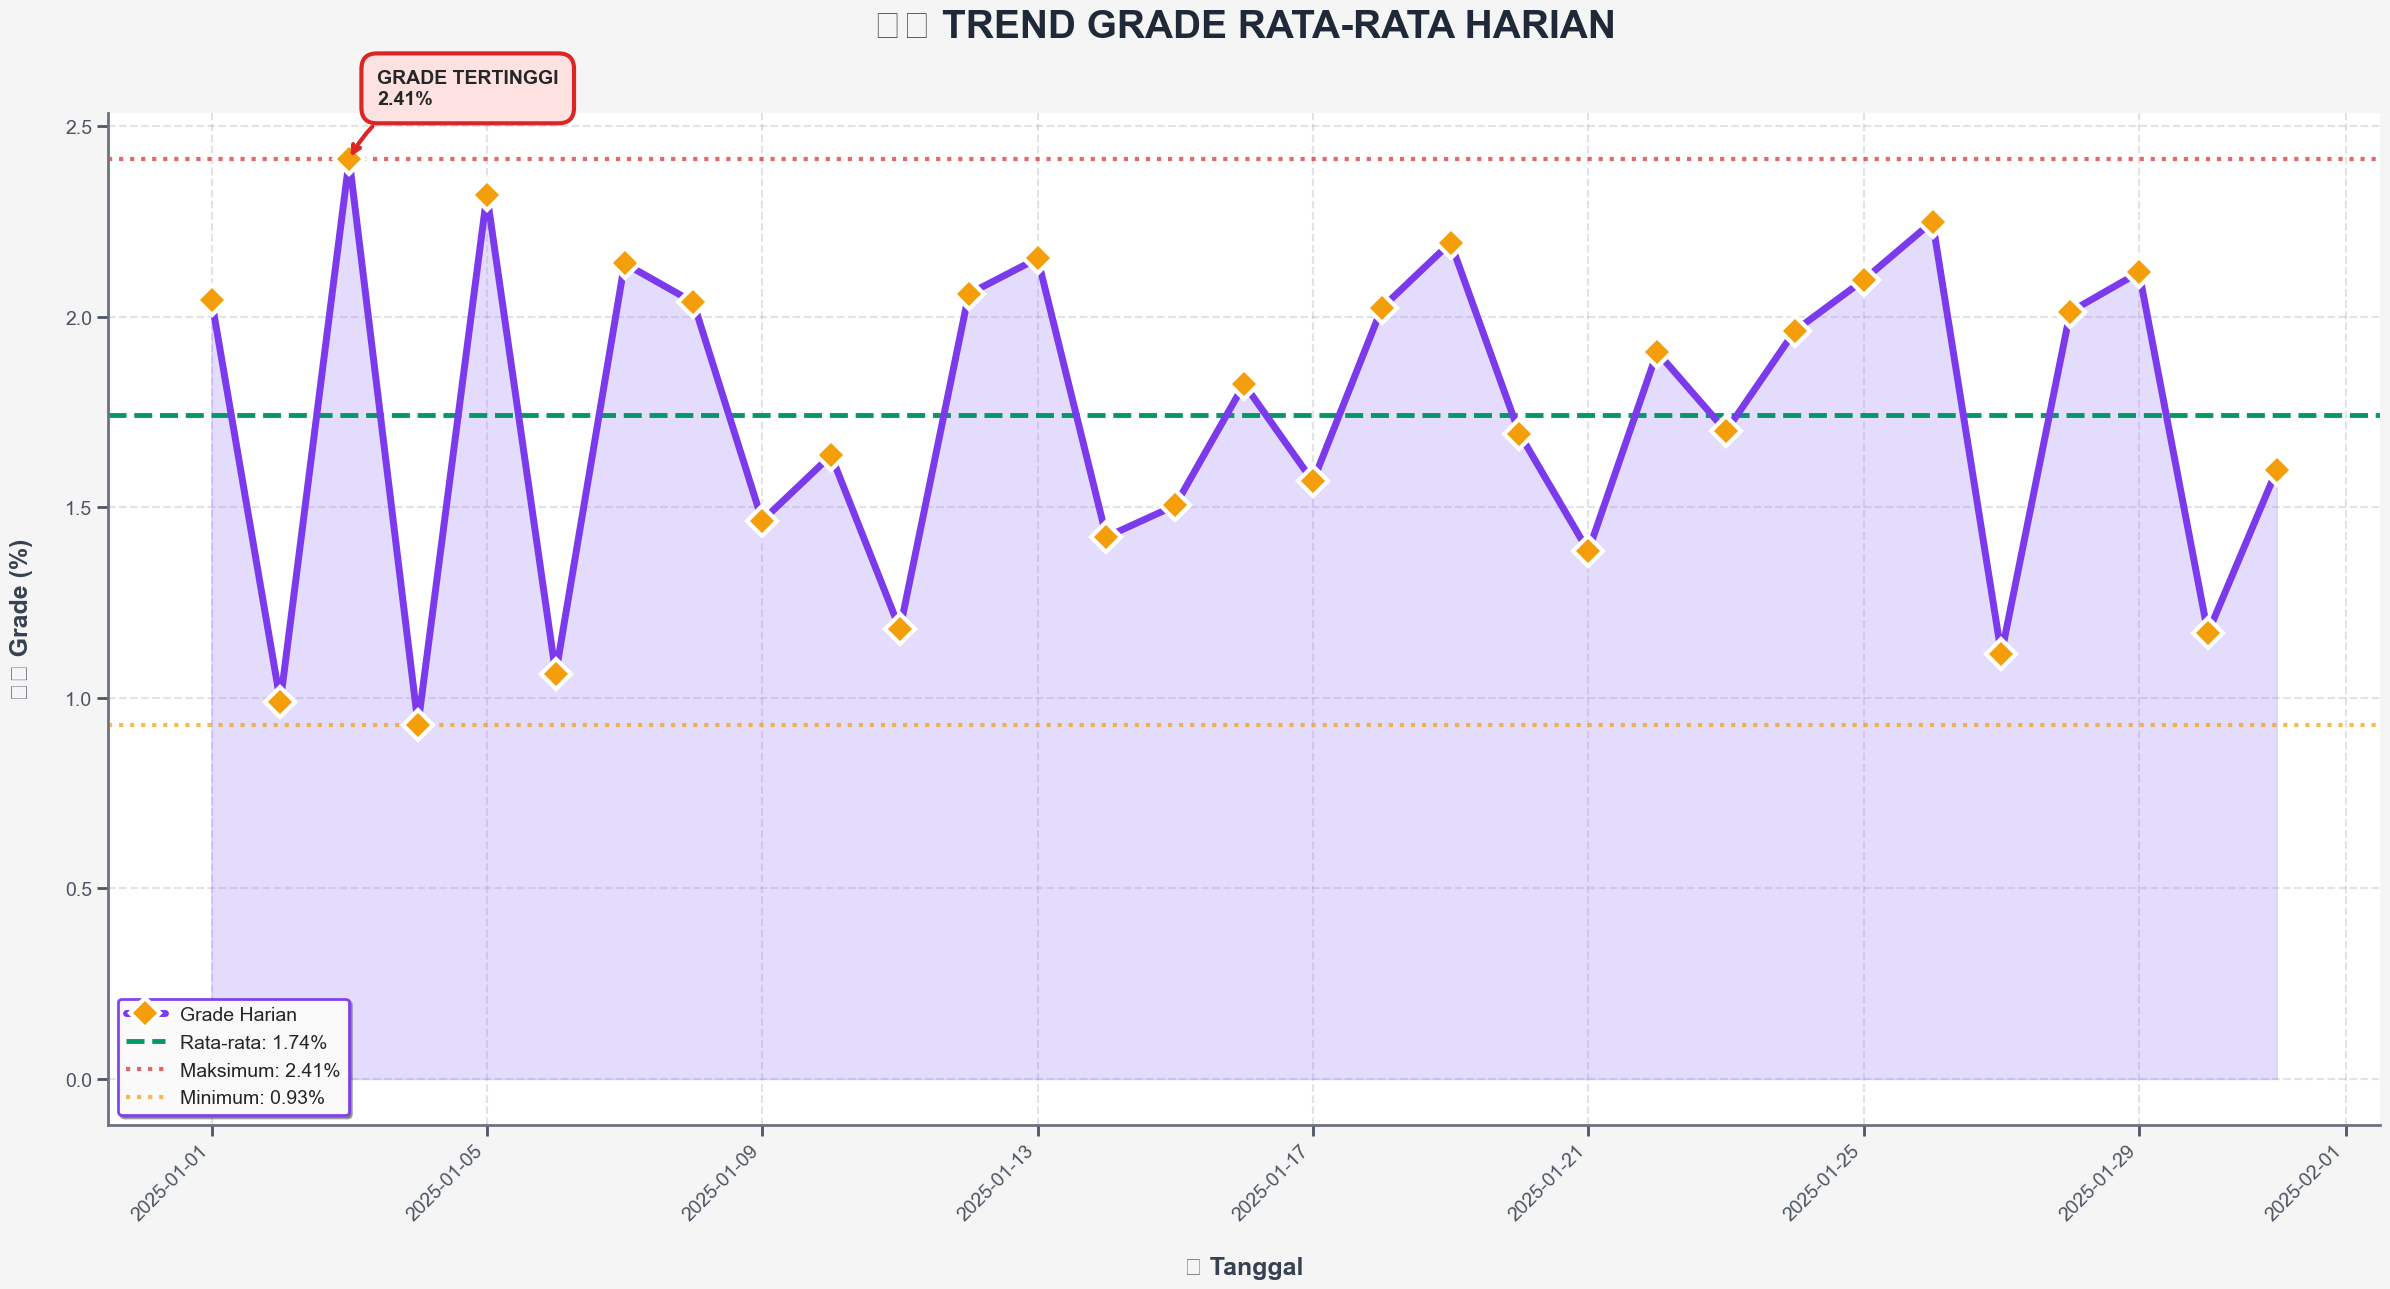

In [29]:
fig2 = plt.figure(figsize=(24, 13))
fig2.patch.set_facecolor('#F5F5F5')

daily_grade = df.groupby('date')['average_grade_pct'].mean().sort_index()

ax2 = plt.subplot(1, 1, 1)
ax2.set_facecolor('#FFFFFF')

# Plot line dengan gradient effect
ax2.plot(daily_grade.index, daily_grade.values, 
         marker='D', linewidth=5, markersize=15, 
         color='#7C3AED', markerfacecolor='#F59E0B', 
         markeredgecolor='white', markeredgewidth=3,
         label='Grade Harian', zorder=3)

# Fill area dengan gradient
ax2.fill_between(daily_grade.index, daily_grade.values, 
                 alpha=0.3, color='#A78BFA', zorder=1)

# Tambahkan garis mean dan max
mean_grade = daily_grade.mean()
max_grade = daily_grade.max()
min_grade = daily_grade.min()

ax2.axhline(y=mean_grade, color='#059669', linestyle='--', linewidth=3.5, 
            label=f'Rata-rata: {mean_grade:.2f}%', zorder=2)
ax2.axhline(y=max_grade, color='#DC2626', linestyle=':', linewidth=3, 
            label=f'Maksimum: {max_grade:.2f}%', alpha=0.7, zorder=2)
ax2.axhline(y=min_grade, color='#F59E0B', linestyle=':', linewidth=3, 
            label=f'Minimum: {min_grade:.2f}%', alpha=0.7, zorder=2)

# Anotasi untuk nilai tertinggi
max_grade_idx = daily_grade.idxmax()
ax2.annotate(f'GRADE TERTINGGI\n{max_grade:.2f}%', 
             xy=(max_grade_idx, max_grade), 
             xytext=(20, 40), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#FEE2E2', 
                      edgecolor='#DC2626', linewidth=3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                           color='#DC2626', linewidth=3),
             fontsize=14, fontweight='bold', ha='left')

# Title dan labels
ax2.set_title('⚗️ TREND GRADE RATA-RATA HARIAN\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax2.set_xlabel('\n📅 Tanggal', fontsize=18, fontweight='bold', color='#374151')
ax2.set_ylabel('⚗️ Grade (%)\n', fontsize=18, fontweight='bold', color='#374151')

# Styling
ax2.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, color='#9CA3AF')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_color('#6B7280')
ax2.spines['bottom'].set_color('#6B7280')

# Legend
legend = ax2.legend(loc='lower left', frameon=True, fontsize=14, 
                    fancybox=True, shadow=True, framealpha=0.95)
legend.get_frame().set_facecolor('#FFFFFF')
legend.get_frame().set_edgecolor('#7C3AED')
legend.get_frame().set_linewidth(2)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('2_trend_grade_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("✅ Grafik 2 disimpan: '2_trend_grade_harian_HD.png'")

### == GRAFIK 3: PERFORMA PIT (ULTRA HD) ==

C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\4129131588.py:67: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\4129131588.py:67: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\4129131588.py:67: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\4129131588.py:67: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\4129131588.py:68: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig('3_performa_pit_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\4129131588.py:68: UserWarning: Glyph 127959 (\N{BUILD

✅ Grafik 3 disimpan: '3_performa_pit_HD.png'


c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


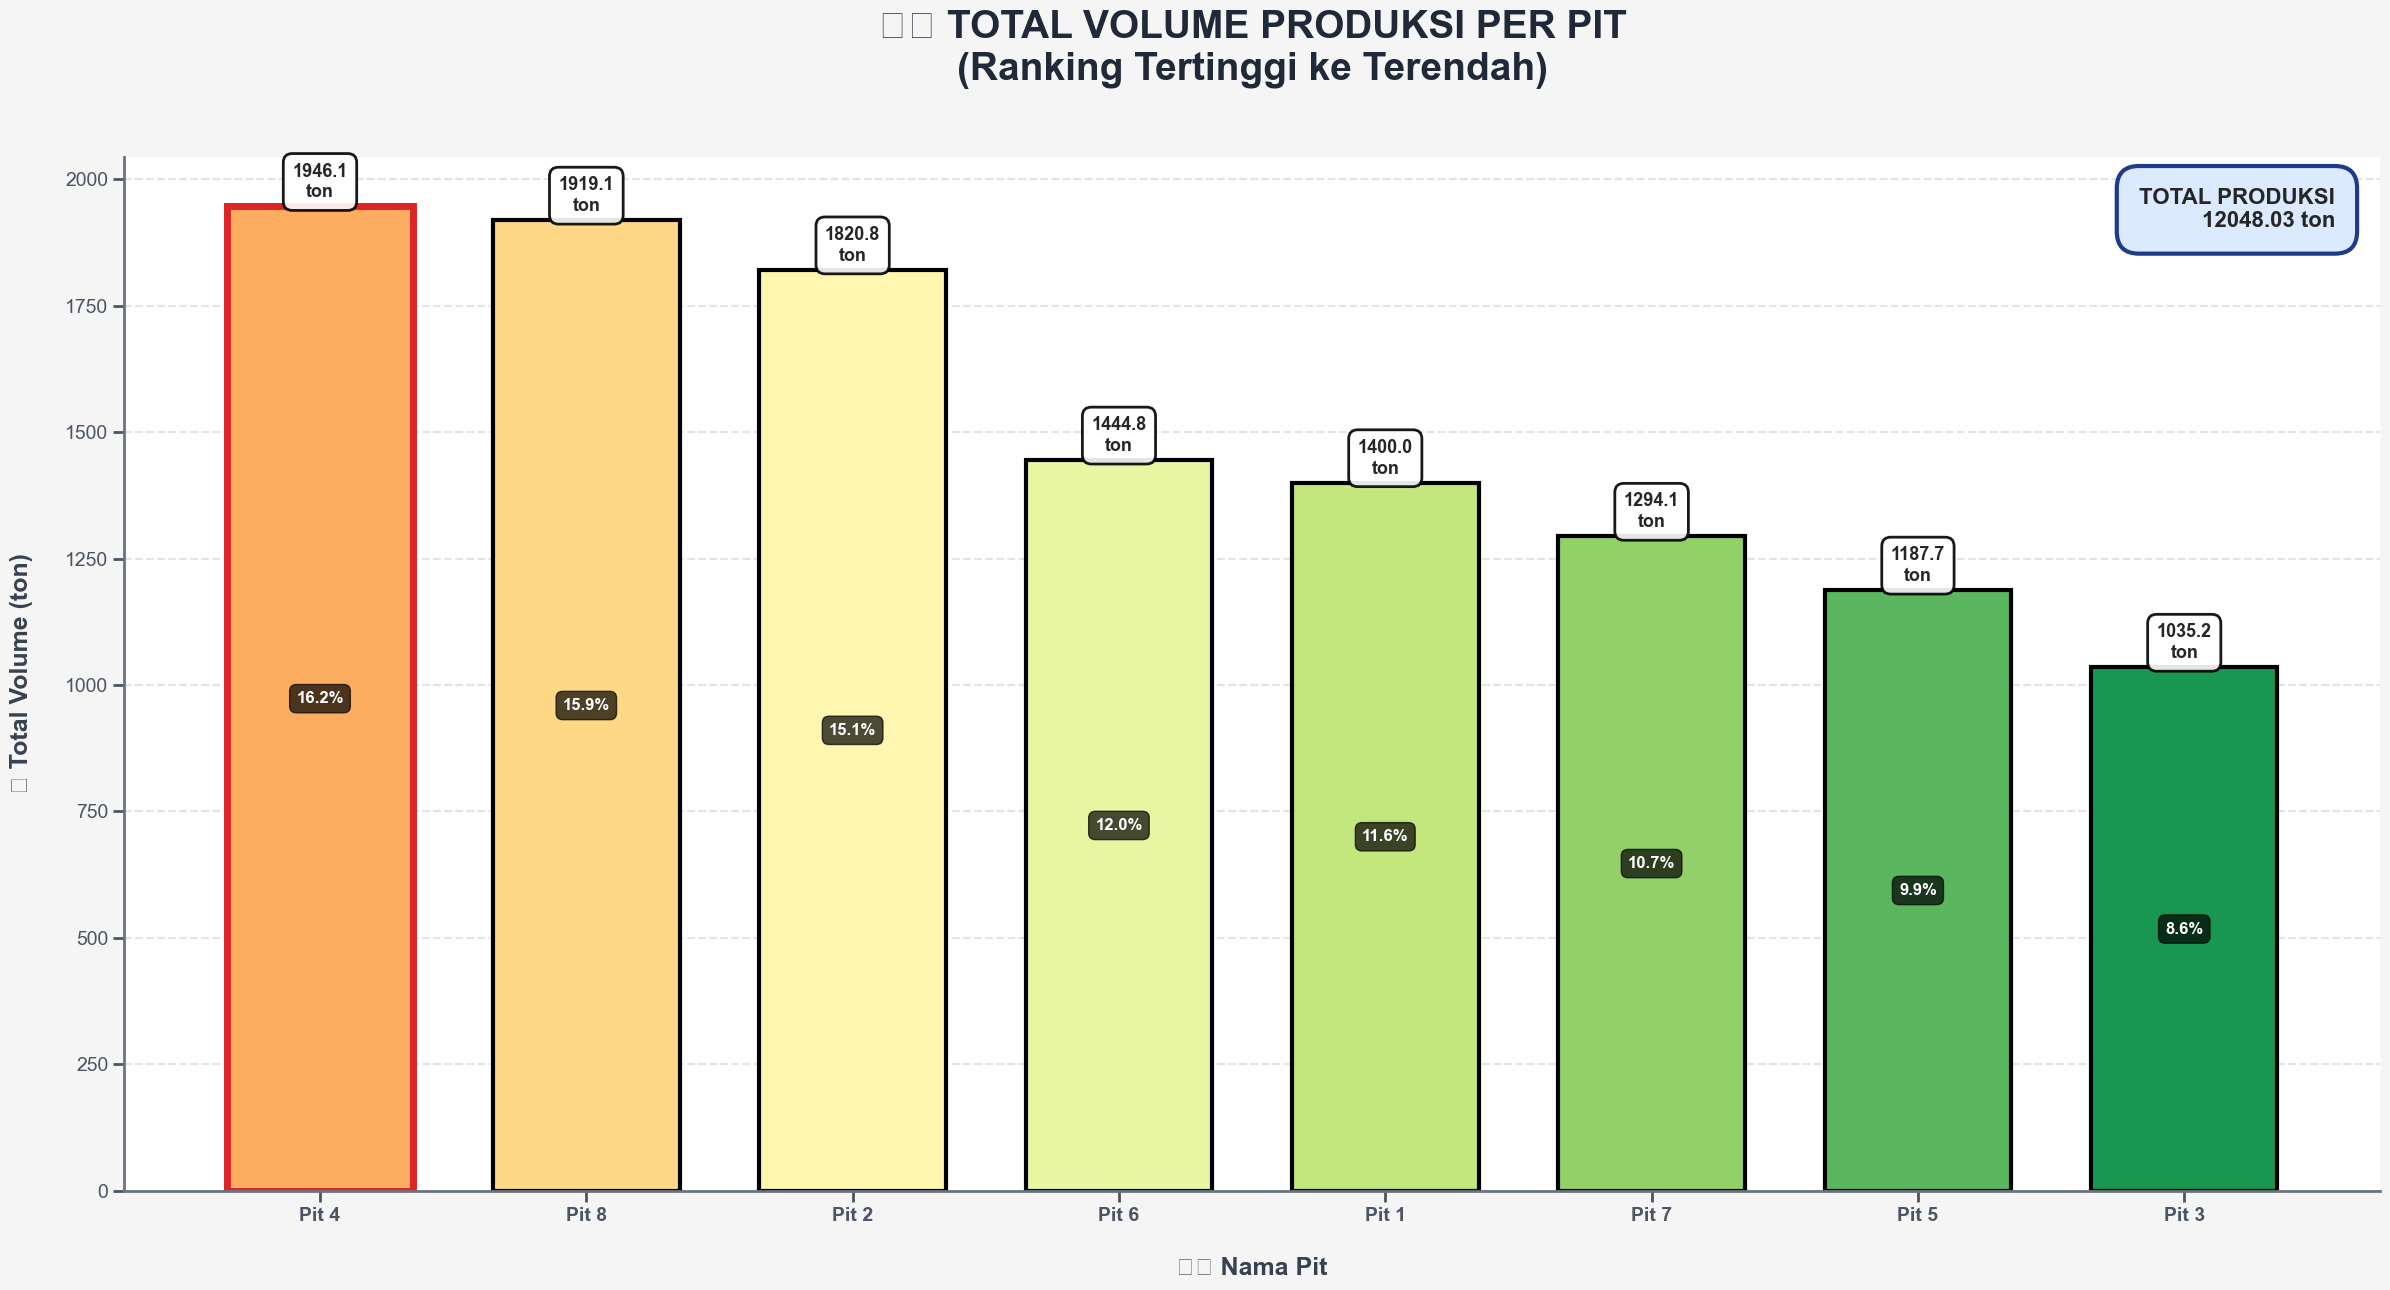

In [30]:
fig3 = plt.figure(figsize=(24, 13))
fig3.patch.set_facecolor('#F5F5F5')

ax3 = plt.subplot(1, 1, 1)
ax3.set_facecolor('#FFFFFF')

pit_volume = df.groupby('pit_name')['total_volume_ton'].sum().sort_values(ascending=False)
colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(pit_volume)))

bars = ax3.bar(range(len(pit_volume)), pit_volume.values, 
               color=colors_gradient, edgecolor='black', linewidth=3, width=0.7)

# Gradient effect pada bars
for i, (bar, value) in enumerate(zip(bars, pit_volume.values)):
    # Tambahkan highlight pada bar tertinggi
    if value == pit_volume.max():
        bar.set_edgecolor('#DC2626')
        bar.set_linewidth(5)
        bar.set_alpha(1.0)
        # Crown emoji
        ax3.text(bar.get_x() + bar.get_width()/2, value + 30, '👑', 
                ha='center', fontsize=30)
    
    # Tambahkan nilai di atas bar dengan background
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 10, 
             f'{height:.1f}\nton', 
             ha='center', va='bottom', fontsize=13, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor='black', linewidth=2, alpha=0.9))
    
    # Tambahkan persentase
    percentage = (value / pit_volume.sum()) * 100
    ax3.text(bar.get_x() + bar.get_width()/2, height/2, 
             f'{percentage:.1f}%', 
             ha='center', va='center', fontsize=12, fontweight='bold',
             color='white',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='black', alpha=0.7))

# Title dan labels
ax3.set_title('🏗️ TOTAL VOLUME PRODUKSI PER PIT\n(Ranking Tertinggi ke Terendah)\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax3.set_xlabel('\n🏗️ Nama Pit', fontsize=18, fontweight='bold', color='#374151')
ax3.set_ylabel('📦 Total Volume (ton)\n', fontsize=18, fontweight='bold', color='#374151')

ax3.set_xticks(range(len(pit_volume)))
ax3.set_xticklabels(pit_volume.index, fontsize=15, fontweight='bold')

# Styling
ax3.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax3.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, axis='y', color='#9CA3AF')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_linewidth(2)
ax3.spines['left'].set_color('#6B7280')
ax3.spines['bottom'].set_color('#6B7280')

# Tambahkan info total
total_volume = pit_volume.sum()
ax3.text(0.98, 0.97, f'TOTAL PRODUKSI\n{total_volume:.2f} ton', 
         transform=ax3.transAxes, fontsize=16, fontweight='bold',
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=1', facecolor='#DBEAFE', 
                  edgecolor='#1E3A8A', linewidth=3))

plt.tight_layout()
plt.savefig('3_performa_pit_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("✅ Grafik 3 disimpan: '3_performa_pit_HD.png'")

### == GRAFIK 4: GRADE PER PIT (ULTRA HD) ==

C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\592846782.py:58: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\592846782.py:58: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\592846782.py:58: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\592846782.py:58: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\592846782.py:59: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  plt.savefig('4_grade_per_pit_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\592846782.py:59: UserWarning: Glyph 65039 (\N{VARI

✅ Grafik 4 disimpan: '4_grade_per_pit_HD.png'


c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


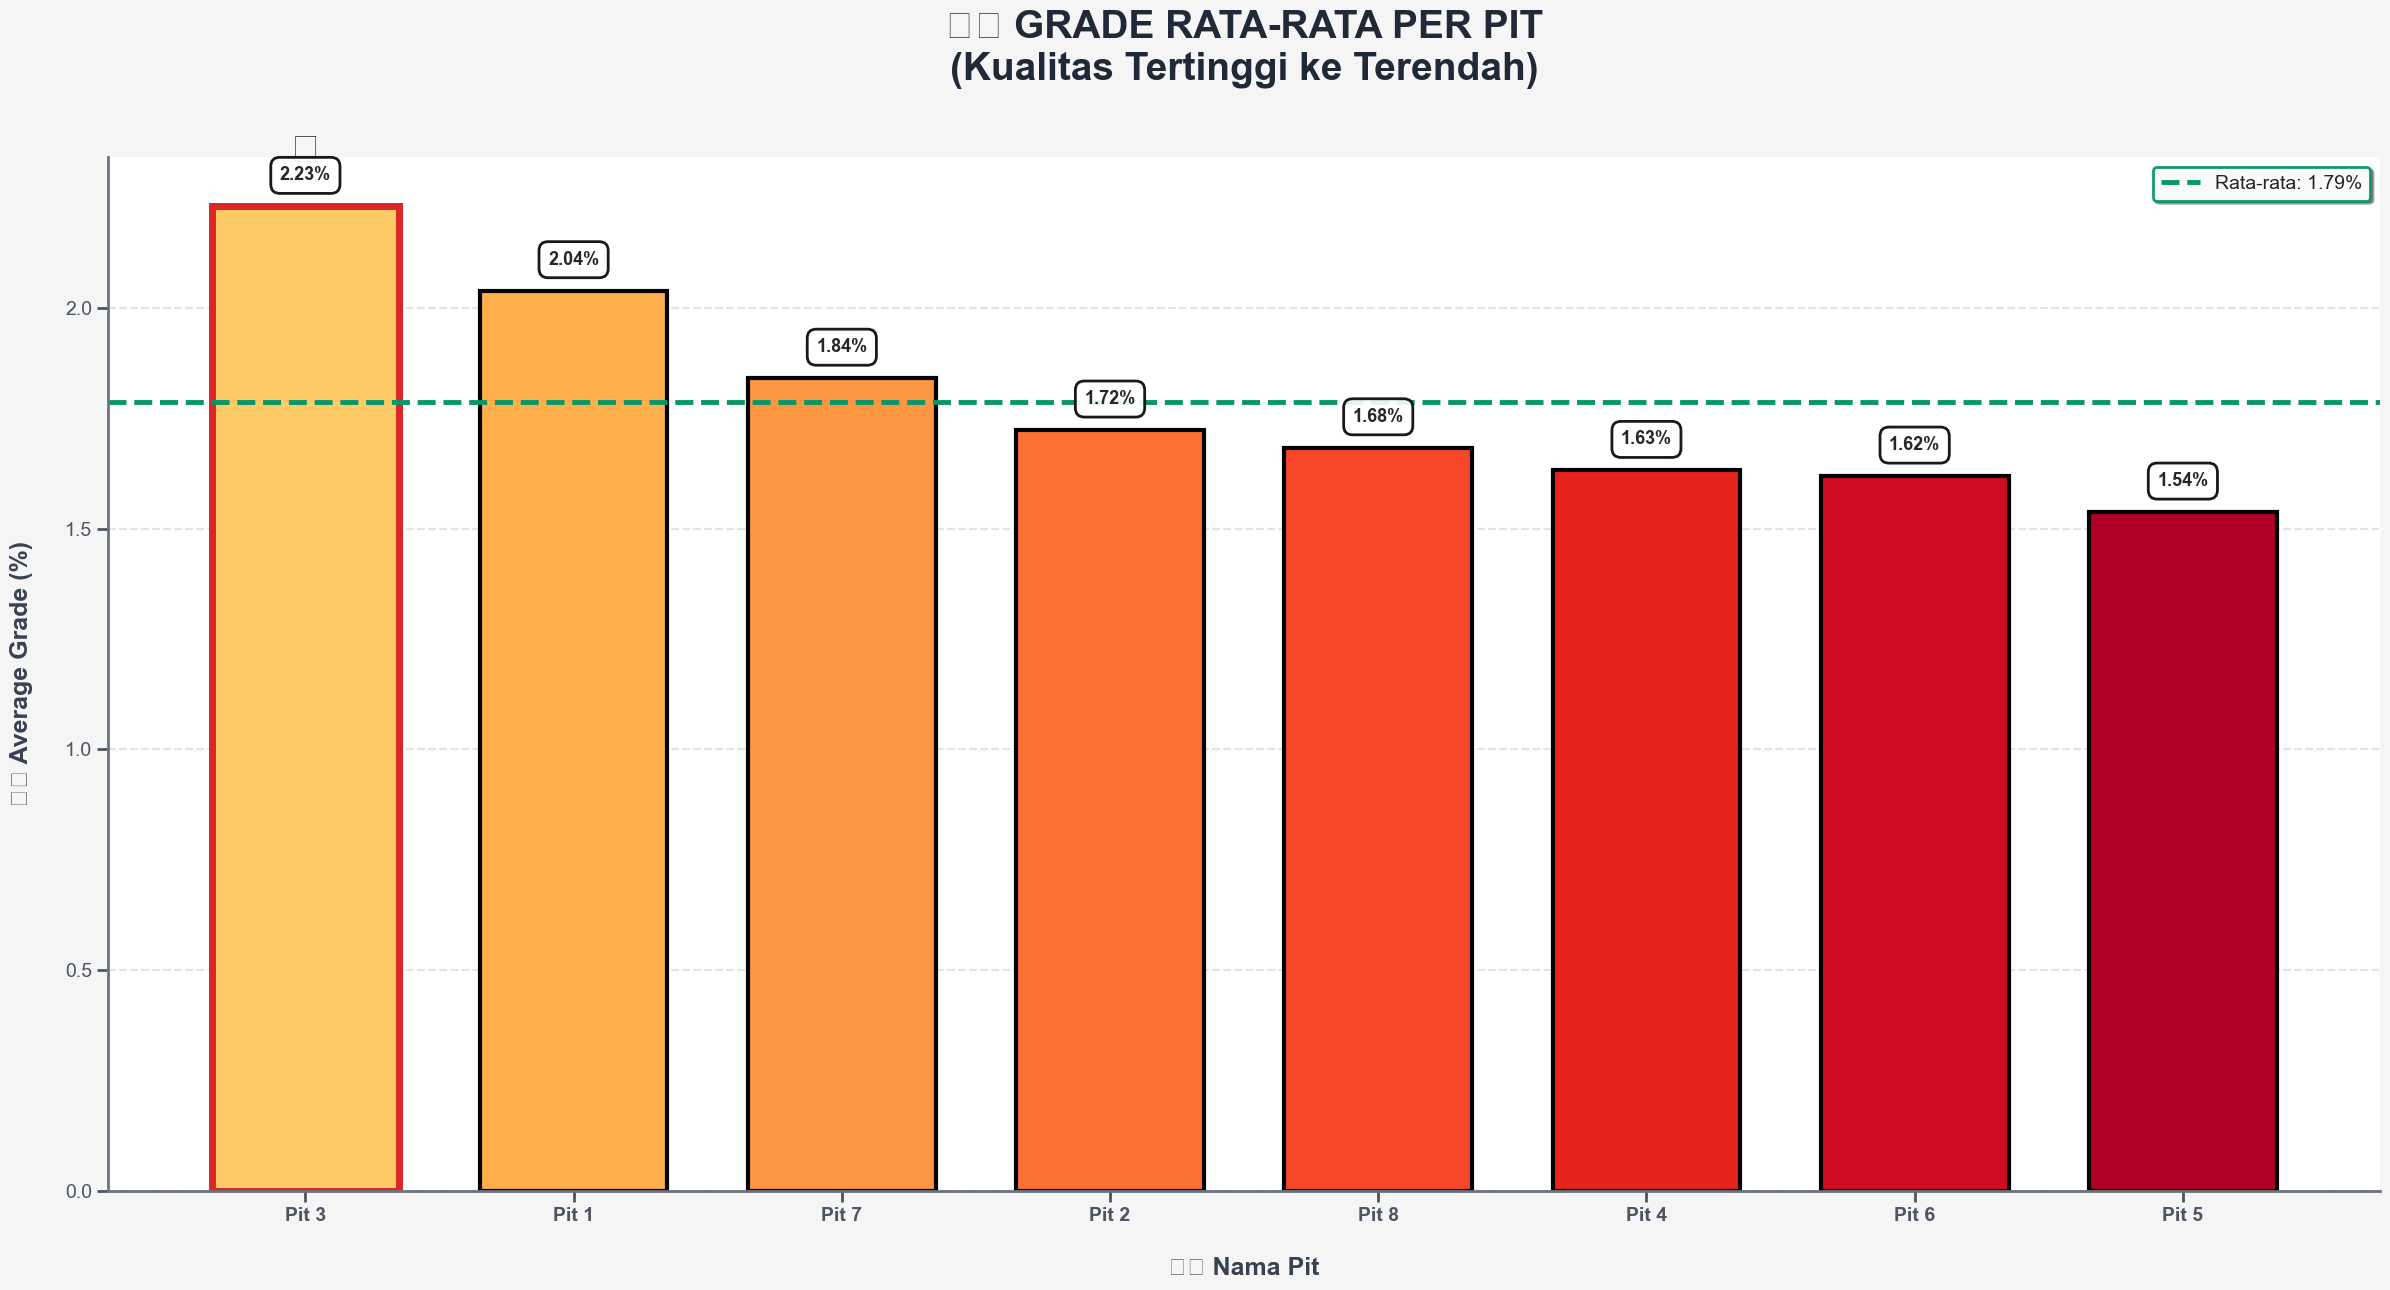

In [31]:
fig4 = plt.figure(figsize=(24, 13))
fig4.patch.set_facecolor('#F5F5F5')

ax4 = plt.subplot(1, 1, 1)
ax4.set_facecolor('#FFFFFF')

pit_grade = df.groupby('pit_name')['average_grade_pct'].mean().sort_values(ascending=False)
colors_grade = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(pit_grade)))

bars = ax4.bar(range(len(pit_grade)), pit_grade.values, 
               color=colors_grade, edgecolor='black', linewidth=3, width=0.7)

# Highlight bar tertinggi
for i, (bar, value) in enumerate(zip(bars, pit_grade.values)):
    if value == pit_grade.max():
        bar.set_edgecolor('#DC2626')
        bar.set_linewidth(5)
        ax4.text(bar.get_x() + bar.get_width()/2, value + 0.1, '⭐', 
                ha='center', fontsize=30)
    
    # Tambahkan nilai
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 0.05, 
             f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=13, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor='black', linewidth=2, alpha=0.9))

# Title dan labels
ax4.set_title('⚗️ GRADE RATA-RATA PER PIT\n(Kualitas Tertinggi ke Terendah)\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax4.set_xlabel('\n🏗️ Nama Pit', fontsize=18, fontweight='bold', color='#374151')
ax4.set_ylabel('⚗️ Average Grade (%)\n', fontsize=18, fontweight='bold', color='#374151')

ax4.set_xticks(range(len(pit_grade)))
ax4.set_xticklabels(pit_grade.index, fontsize=15, fontweight='bold')

# Styling
ax4.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax4.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, axis='y', color='#9CA3AF')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_linewidth(2)
ax4.spines['bottom'].set_linewidth(2)
ax4.spines['left'].set_color('#6B7280')
ax4.spines['bottom'].set_color('#6B7280')

# Tambahkan info rata-rata
avg_grade = pit_grade.mean()
ax4.axhline(y=avg_grade, color='#059669', linestyle='--', linewidth=3.5, 
            label=f'Rata-rata: {avg_grade:.2f}%', zorder=2)
legend = ax4.legend(loc='upper right', fontsize=14, frameon=True, 
                    fancybox=True, shadow=True, framealpha=0.95)
legend.get_frame().set_facecolor('#FFFFFF')
legend.get_frame().set_edgecolor('#059669')
legend.get_frame().set_linewidth(2)

plt.tight_layout()
plt.savefig('4_grade_per_pit_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("✅ Grafik 4 disimpan: '4_grade_per_pit_HD.png'")

### == GRAFIK 5: PERFORMA OPERATOR (ULTRA HD) ==

C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\194262052.py:55: UserWarning: Glyph 128119 (\N{CONSTRUCTION WORKER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\194262052.py:55: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\194262052.py:55: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\194262052.py:56: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig('5_performa_operator_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\194262052.py:56: UserWarning: Glyph 128119 (\N{CONSTRUCTION WORKER}) missing from font(s) Arial.
  plt.savefig('5_performa_operator_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Te

✅ Grafik 5 disimpan: '5_performa_operator_HD.png'


c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128119 (\N{CONSTRUCTION WORKER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


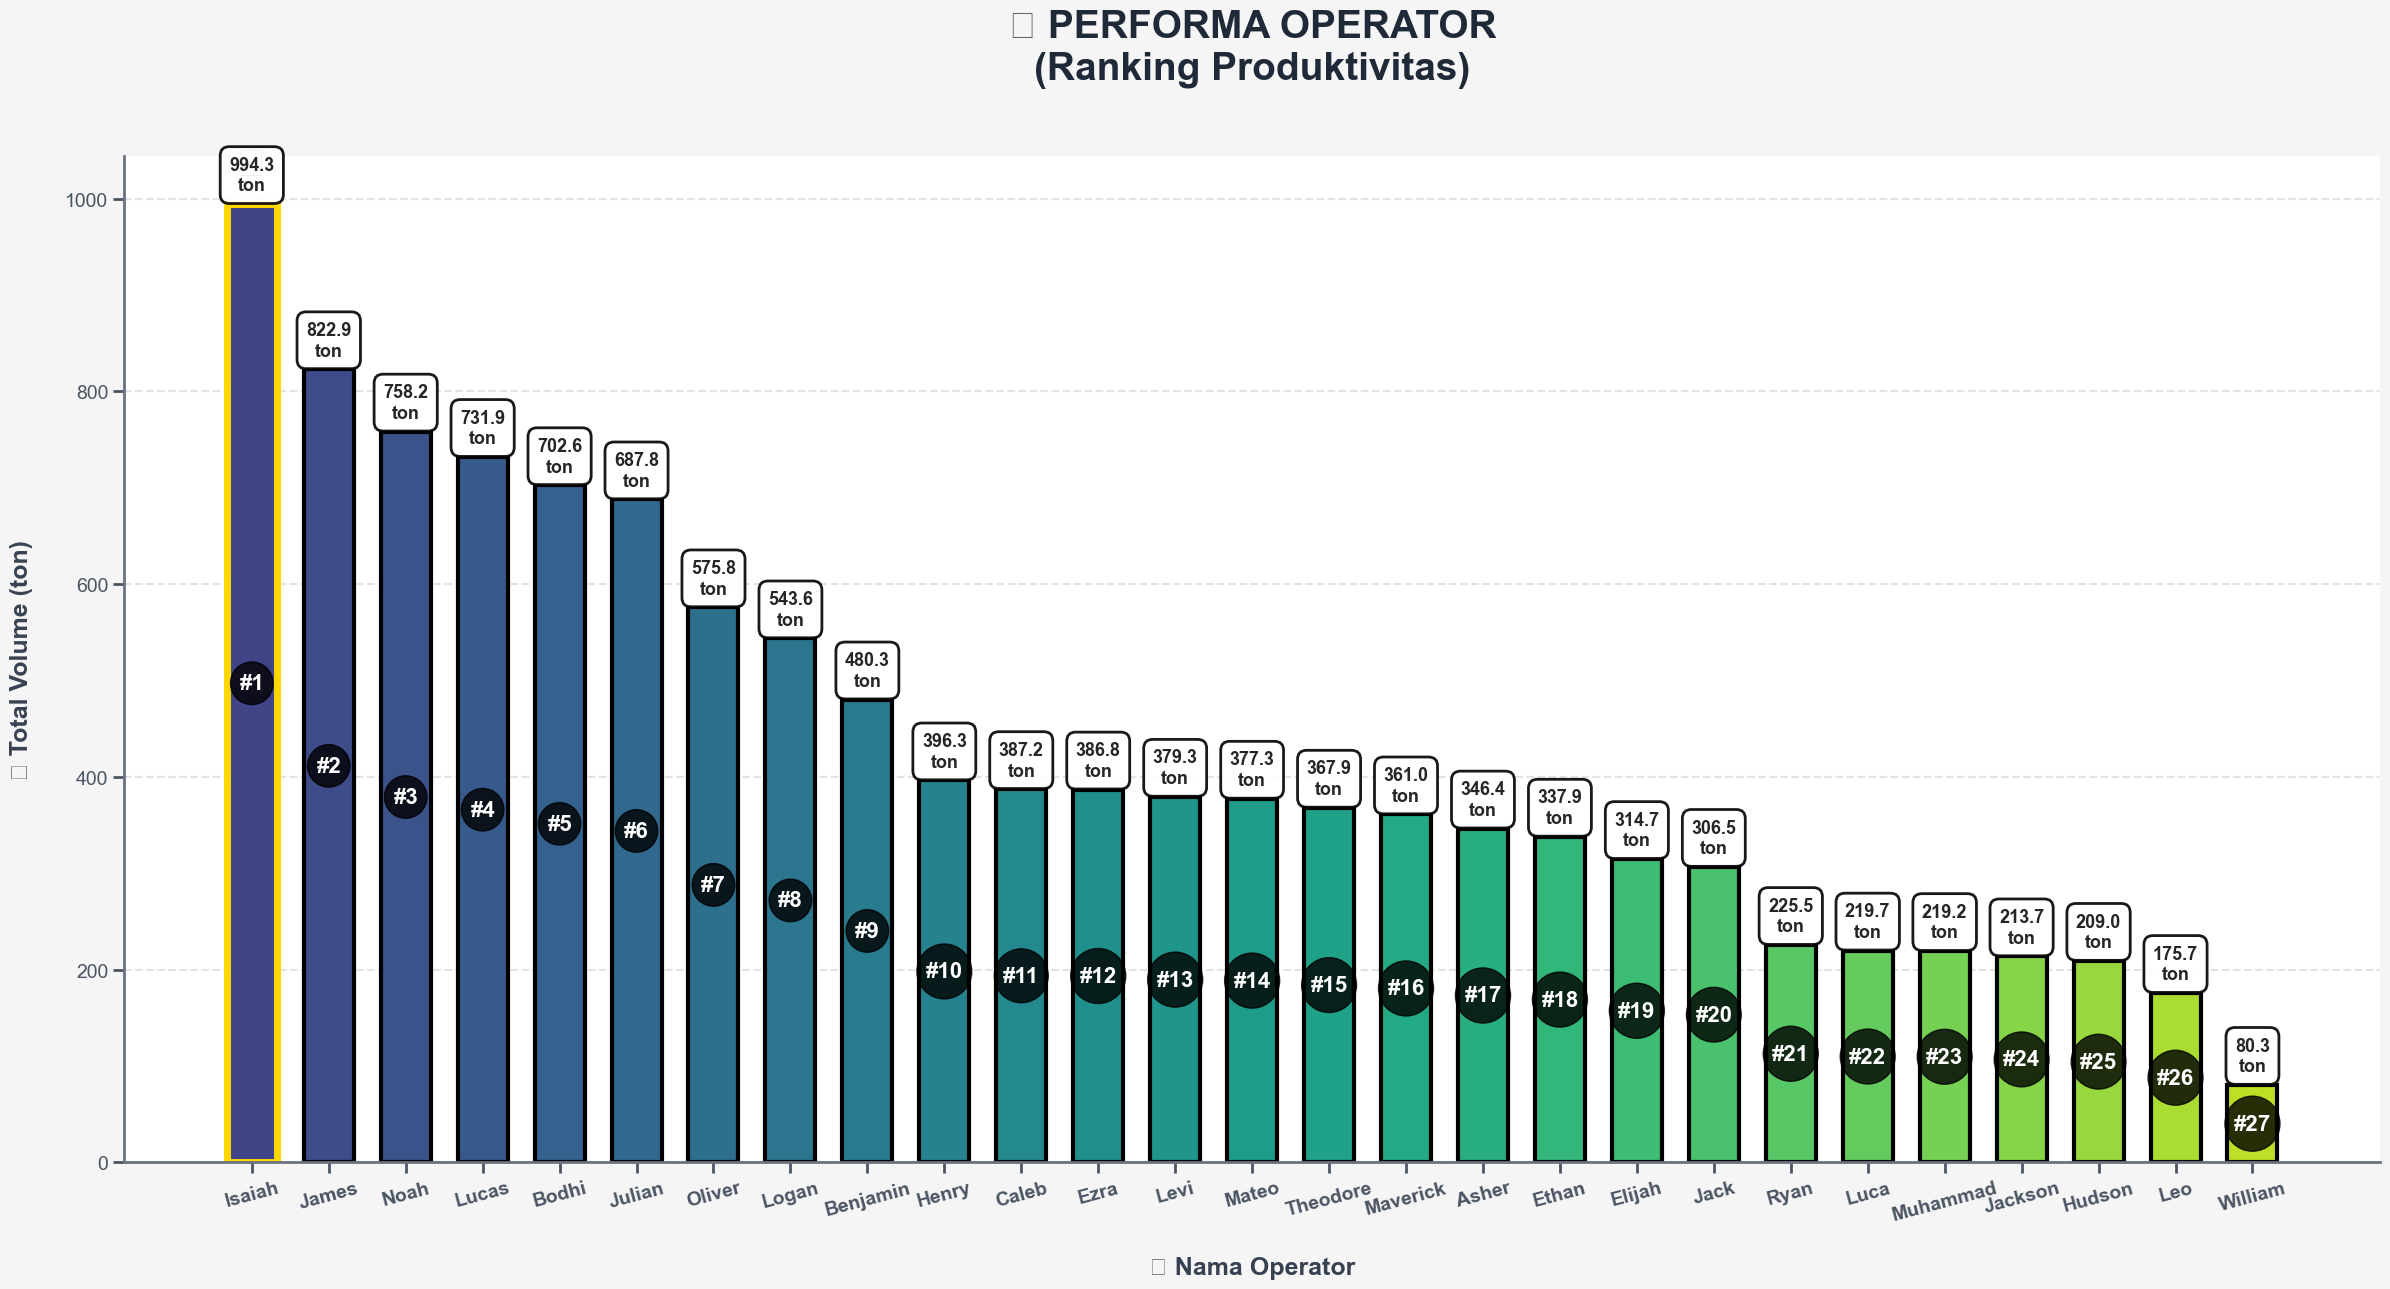

In [32]:
fig5 = plt.figure(figsize=(24, 13))
fig5.patch.set_facecolor('#F5F5F5')

ax5 = plt.subplot(1, 1, 1)
ax5.set_facecolor('#FFFFFF')

operator_volume = df.groupby('operator_name')['total_volume_ton'].sum().sort_values(ascending=False)
colors_op = plt.cm.viridis(np.linspace(0.2, 0.9, len(operator_volume)))

bars = ax5.bar(range(len(operator_volume)), operator_volume.values, 
               color=colors_op, edgecolor='black', linewidth=3, width=0.65)

# Highlight operator terbaik
for i, (bar, value, name) in enumerate(zip(bars, operator_volume.values, operator_volume.index)):
    if i == 0:  # Operator terbaik
        bar.set_edgecolor('#FFD700')
        bar.set_linewidth(5)
        ax5.text(bar.get_x() + bar.get_width()/2, value + 30, '🏆', 
                ha='center', fontsize=30)
    
    # Tambahkan nilai
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2, height + 10, 
             f'{height:.1f}\nton', 
             ha='center', va='bottom', fontsize=13, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor='black', linewidth=2, alpha=0.9))
    
    # Ranking
    ax5.text(bar.get_x() + bar.get_width()/2, height/2, 
             f'#{i+1}', 
             ha='center', va='center', fontsize=16, fontweight='bold',
             color='white',
             bbox=dict(boxstyle='circle,pad=0.4', facecolor='black', alpha=0.8))

# Title dan labels
ax5.set_title('👷 PERFORMA OPERATOR\n(Ranking Produktivitas)\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax5.set_xlabel('\n👷 Nama Operator', fontsize=18, fontweight='bold', color='#374151')
ax5.set_ylabel('📦 Total Volume (ton)\n', fontsize=18, fontweight='bold', color='#374151')

ax5.set_xticks(range(len(operator_volume)))
ax5.set_xticklabels(operator_volume.index, fontsize=15, fontweight='bold', rotation=15)

# Styling
ax5.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax5.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, axis='y', color='#9CA3AF')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_linewidth(2)
ax5.spines['bottom'].set_linewidth(2)
ax5.spines['left'].set_color('#6B7280')
ax5.spines['bottom'].set_color('#6B7280')

plt.tight_layout()
plt.savefig('5_performa_operator_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("✅ Grafik 5 disimpan: '5_performa_operator_HD.png'")

### Menampilkan Semua grafik

C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:79: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:79: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:79: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:80: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig('1_trend_volume_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:80: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig('1_trend_volume_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Pers


✅ Grafik 1 disimpan: '1_trend_volume_harian_HD.png'


C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:150: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:150: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:150: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:151: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  plt.savefig('2_trend_grade_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.savefig('2_trend_grade_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppD

✅ Grafik 2 disimpan: '2_trend_grade_harian_HD.png'


C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:221: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:221: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:221: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:221: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:222: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig('3_performa_pit_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:222: UserWarning: Glyph 127959 (\N

✅ Grafik 3 disimpan: '3_performa_pit_HD.png'


C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:283: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:283: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:283: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:283: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:284: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  plt.savefig('4_grade_per_pit_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:284: UserWarning: Glyph 65

✅ Grafik 4 disimpan: '4_grade_per_pit_HD.png'


C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:342: UserWarning: Glyph 128119 (\N{CONSTRUCTION WORKER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:342: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:342: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:343: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig('5_performa_operator_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppData\Local\Temp\ipykernel_10596\3197739657.py:343: UserWarning: Glyph 128119 (\N{CONSTRUCTION WORKER}) missing from font(s) Arial.
  plt.savefig('5_performa_operator_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
C:\Users\Personal\AppDat

✅ Grafik 5 disimpan: '5_performa_operator_HD.png'


c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


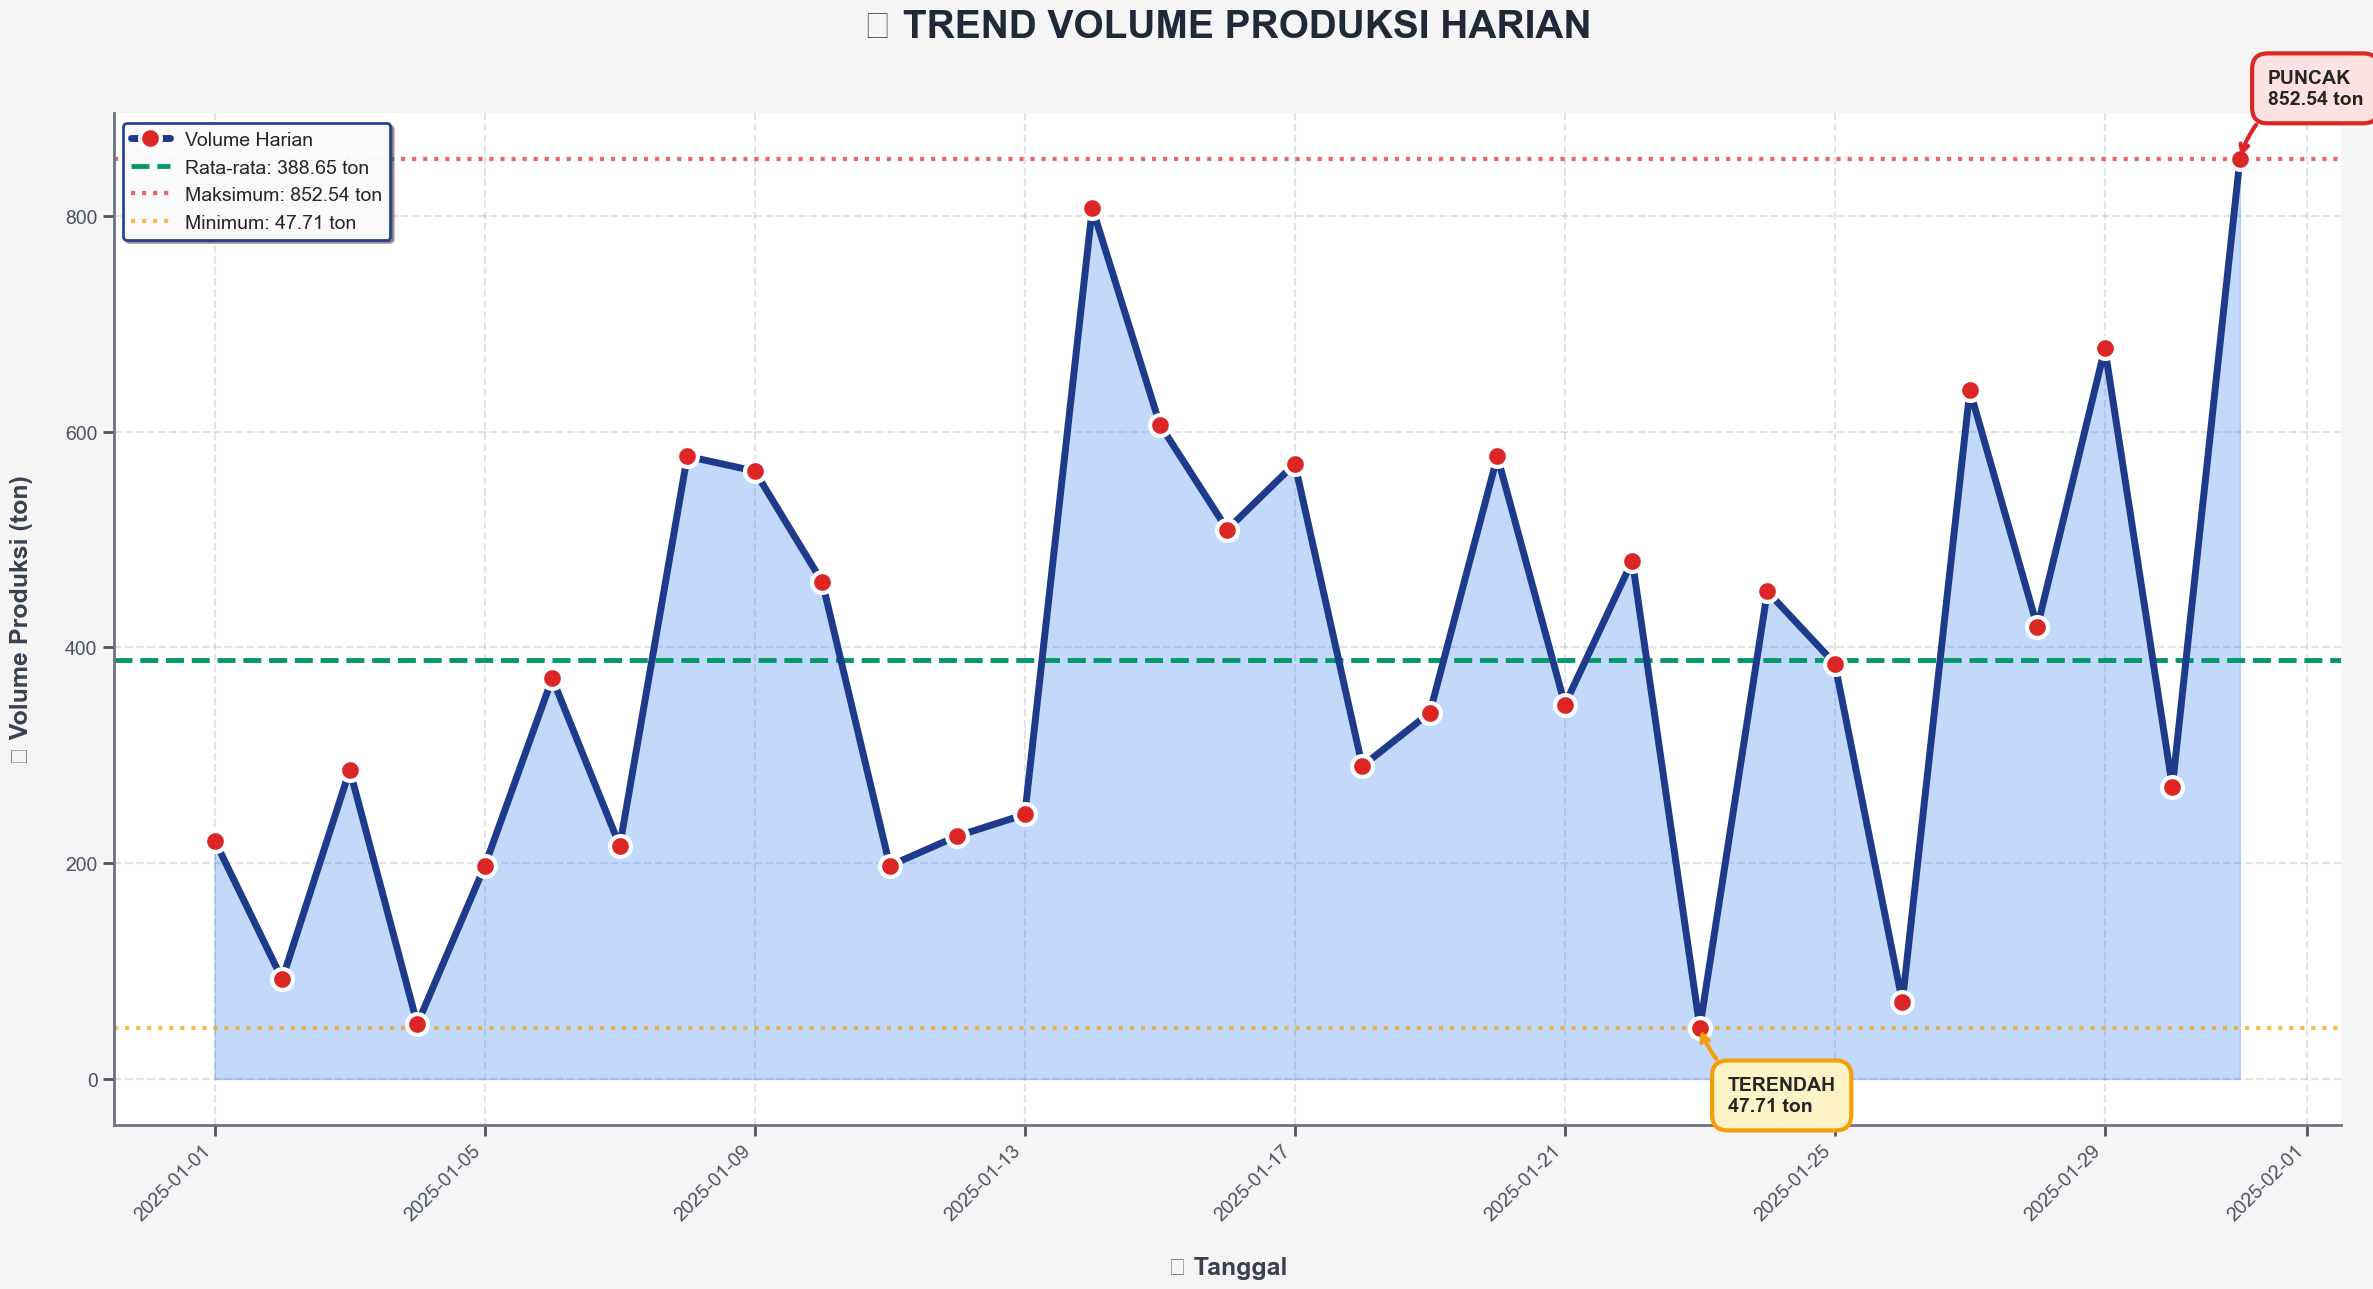

c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9879 (\N{ALEMBIC}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


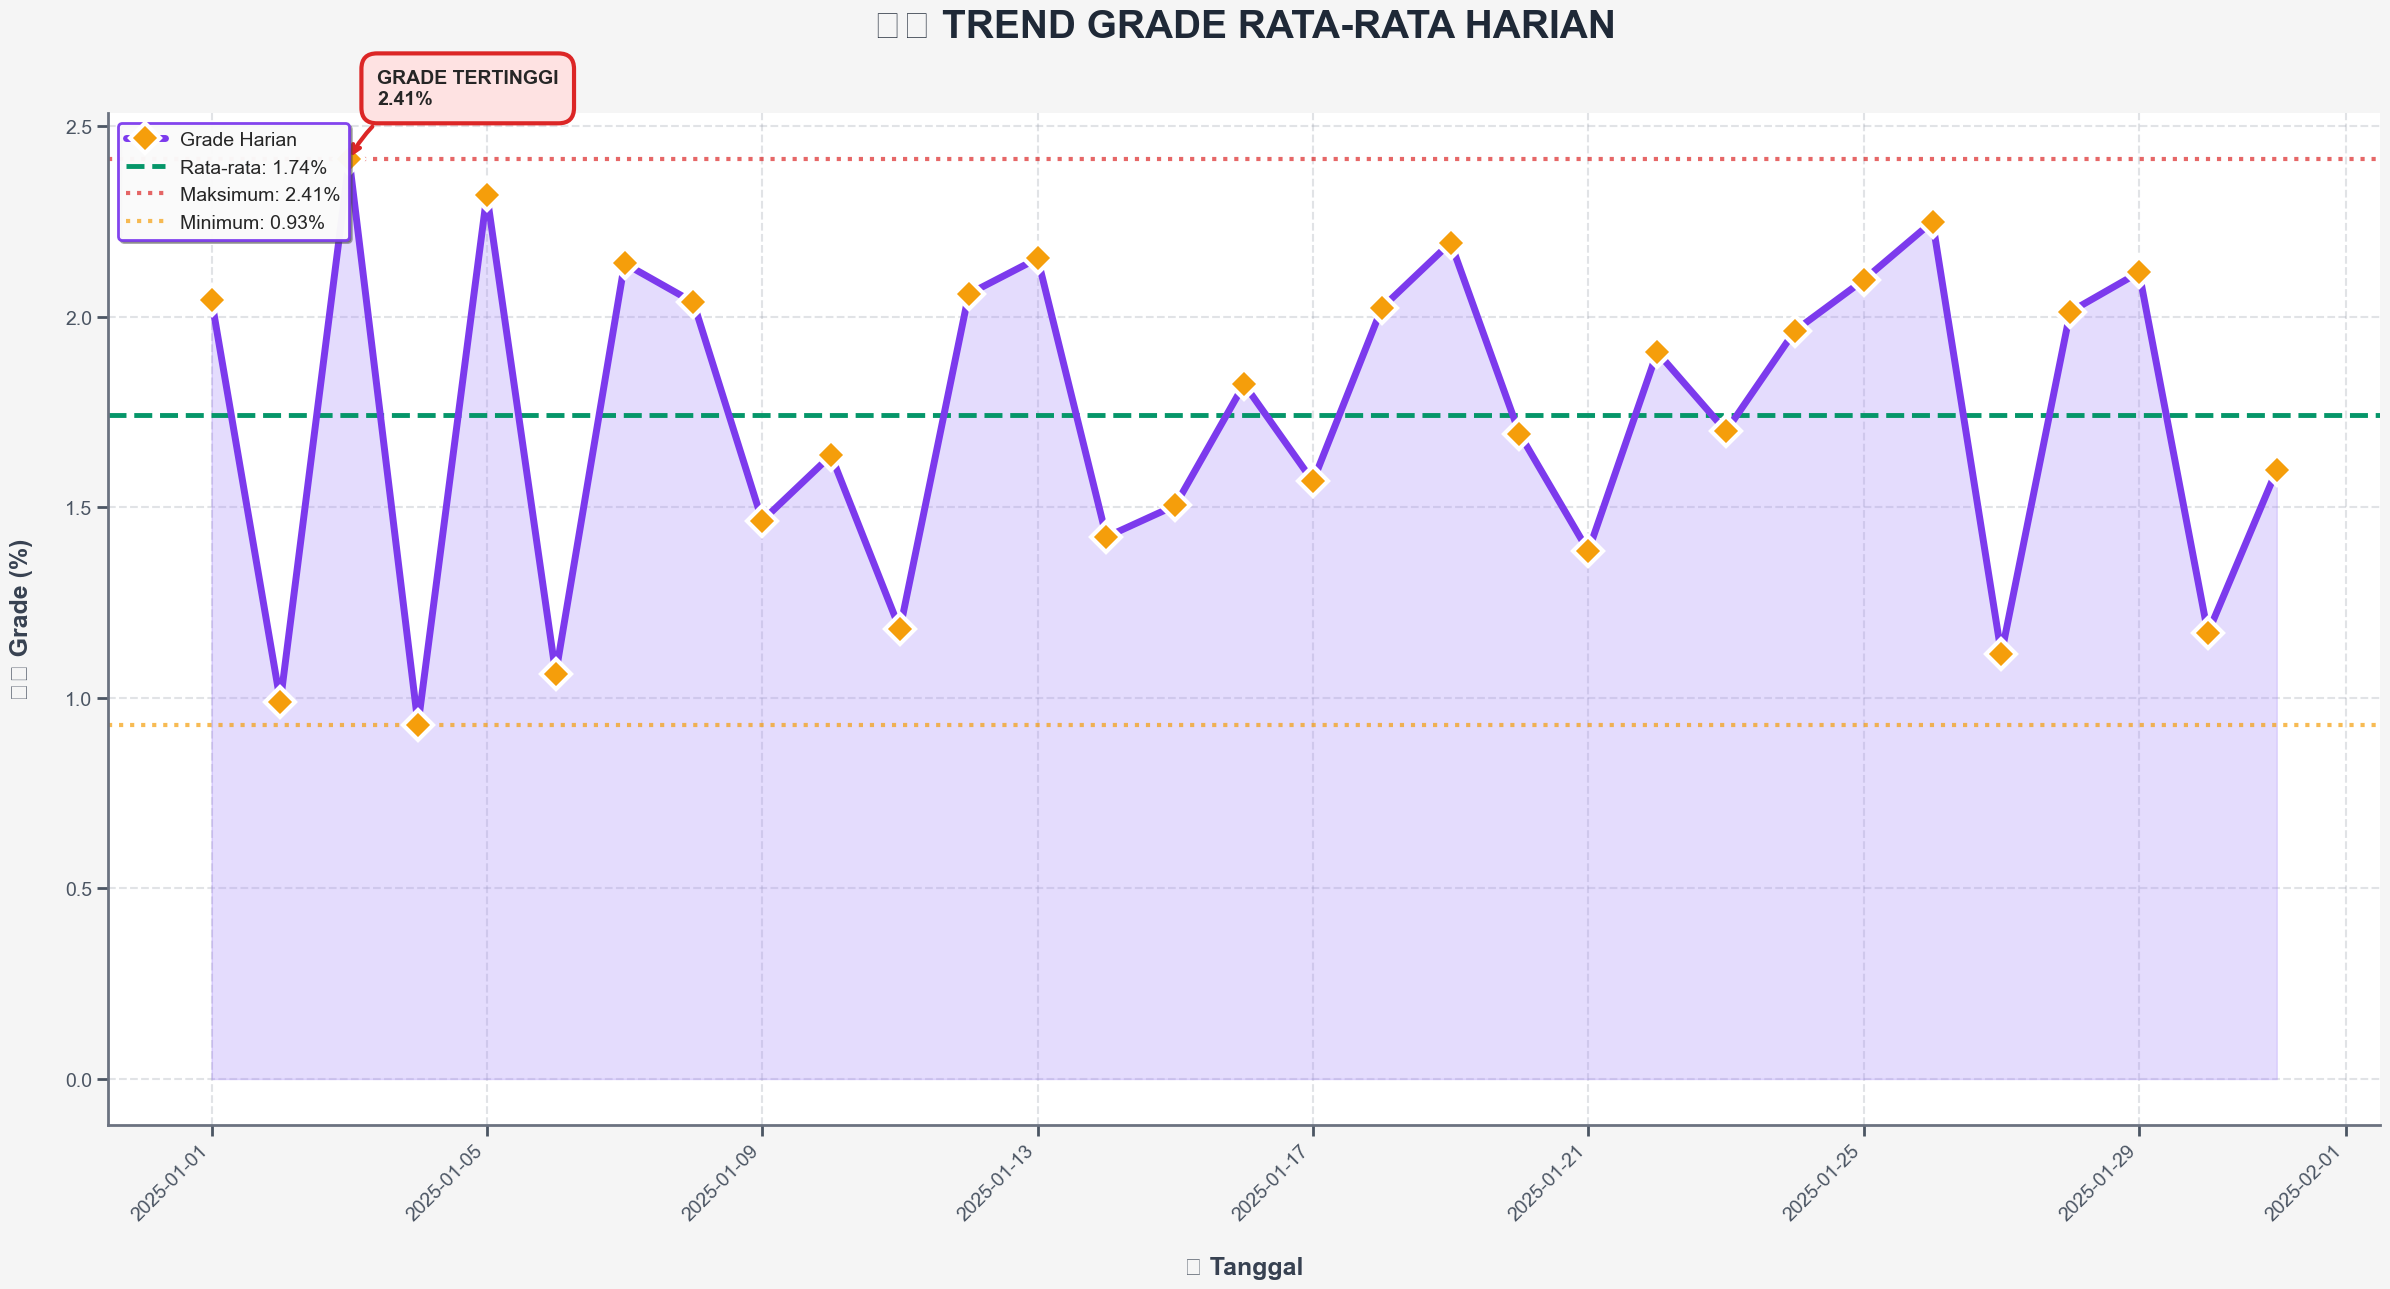

c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


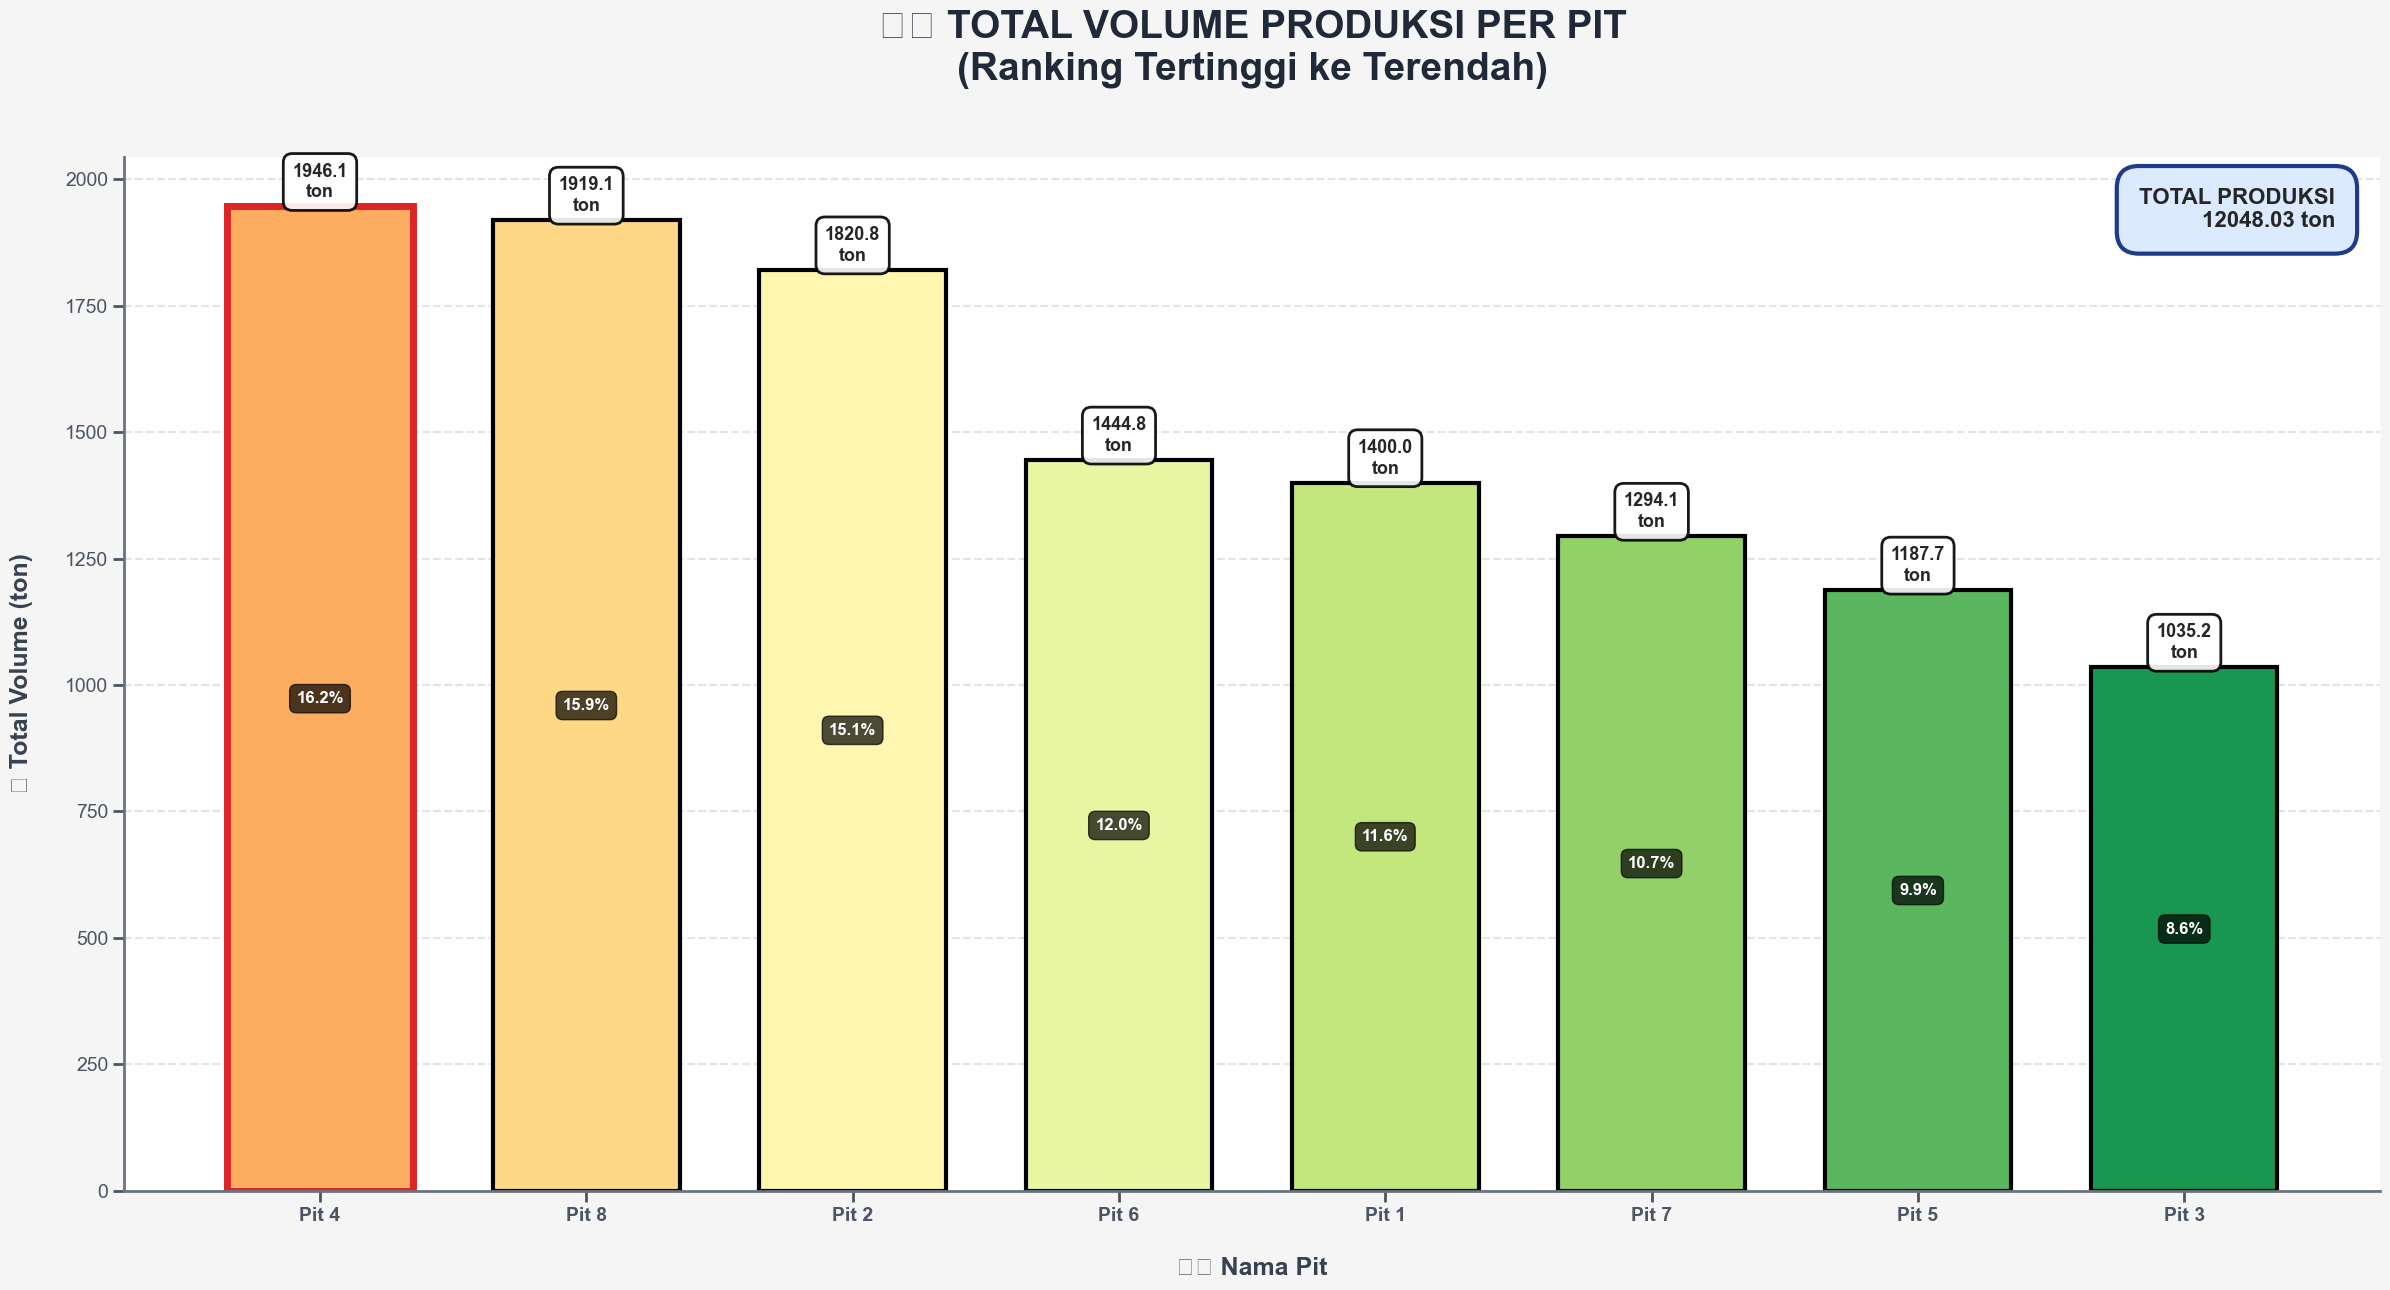

c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


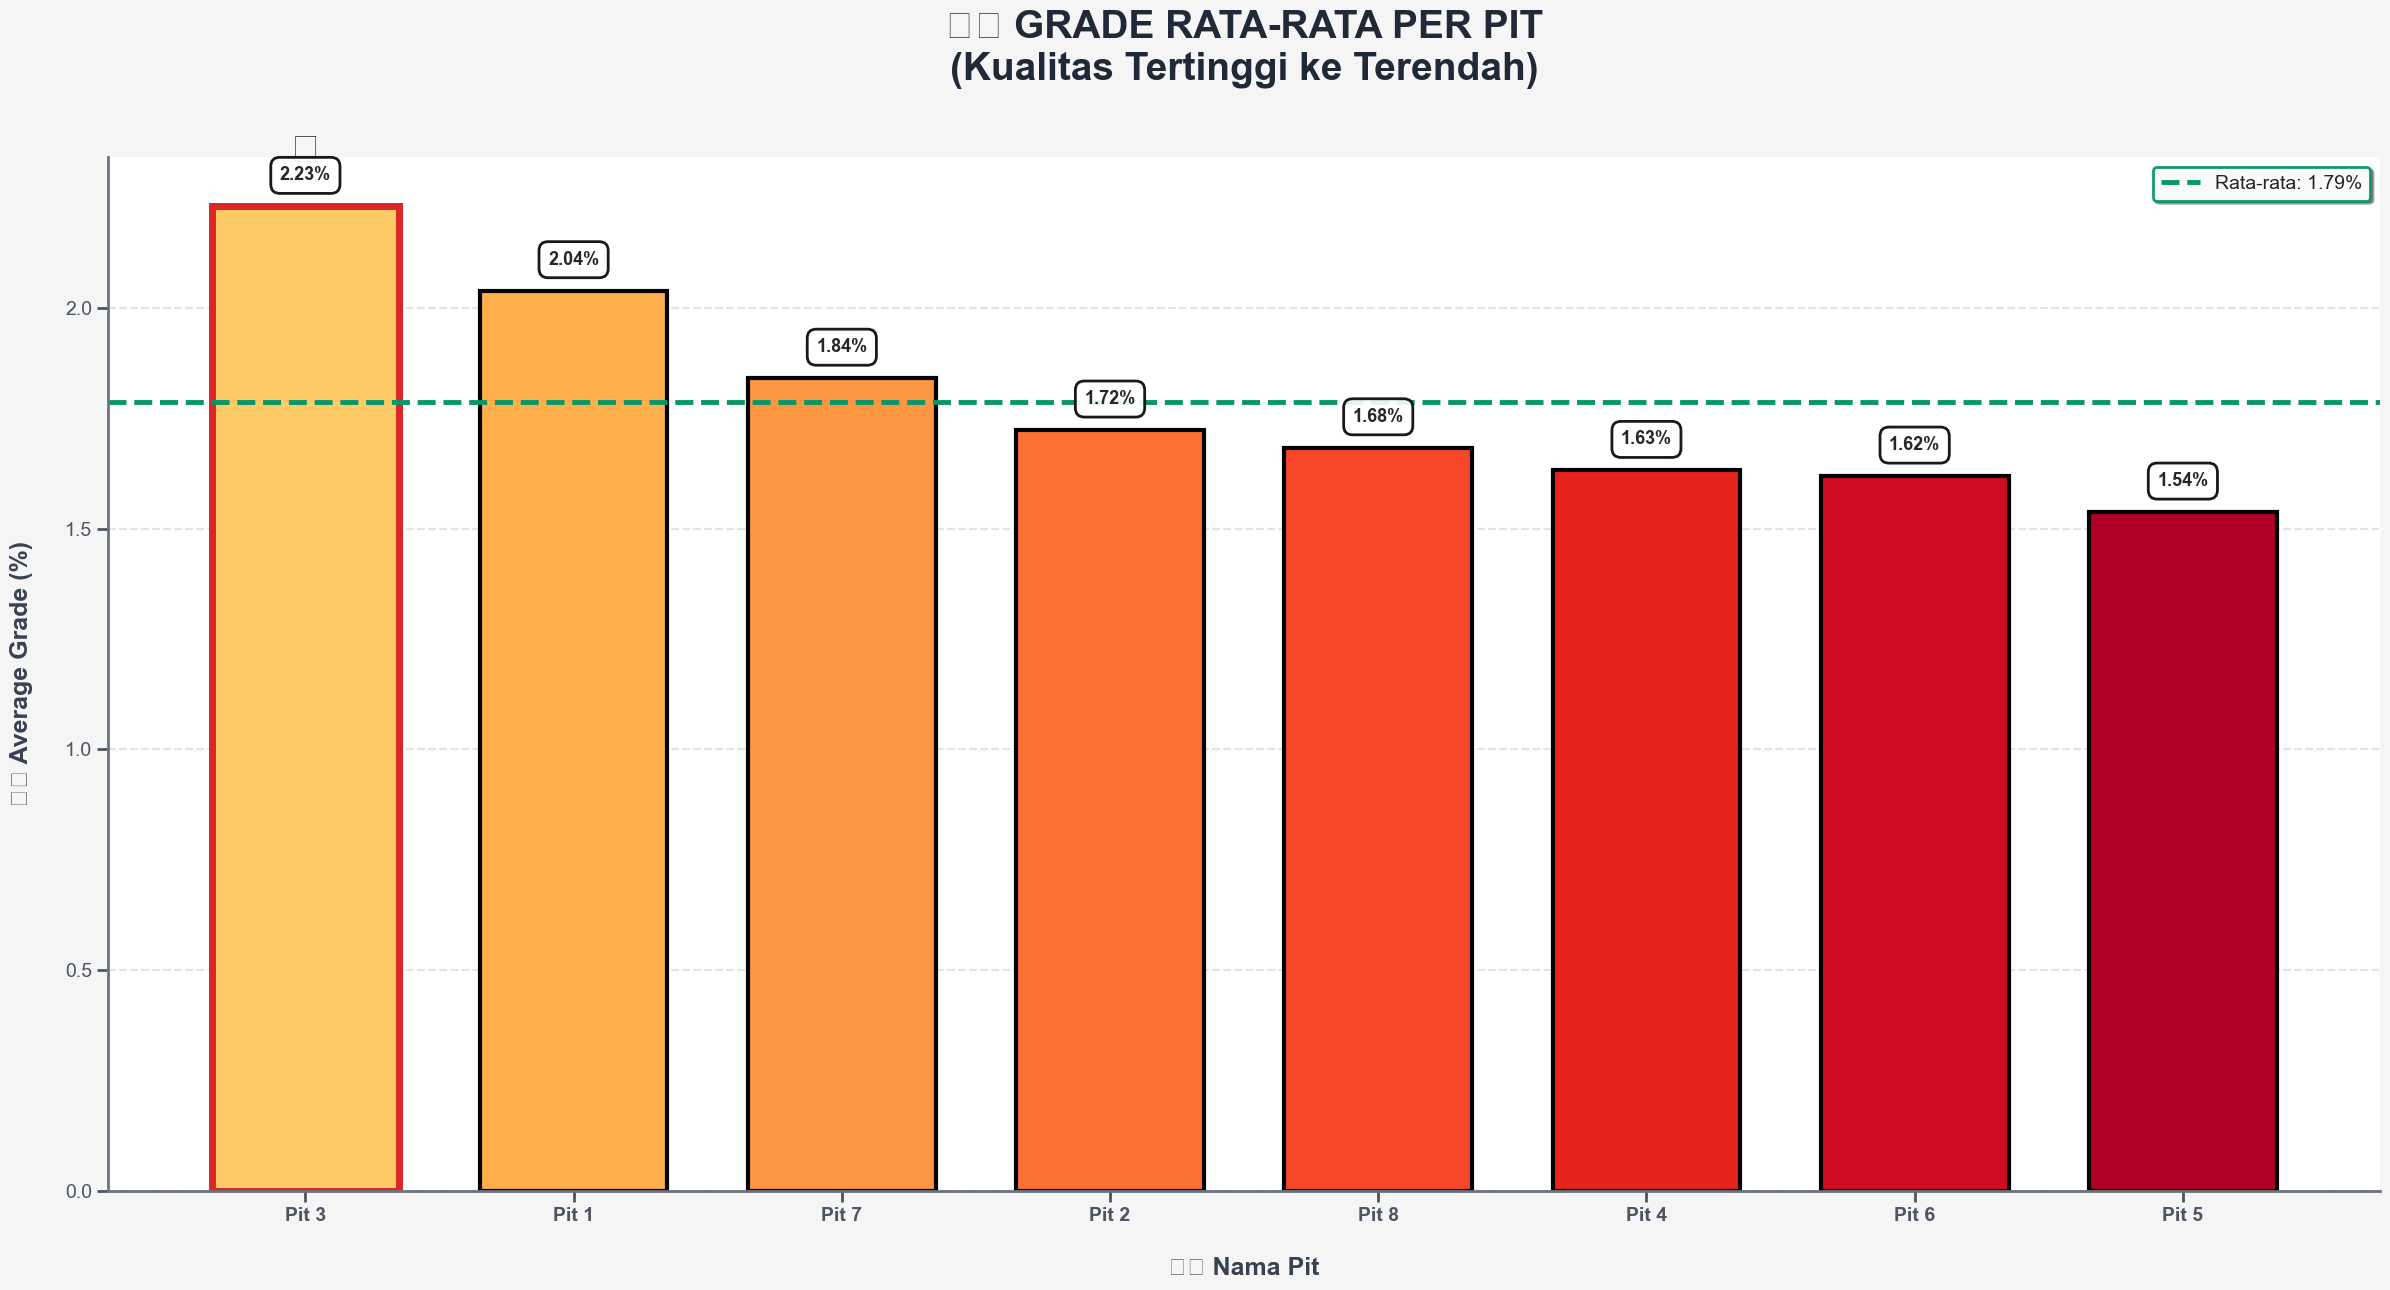

c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128119 (\N{CONSTRUCTION WORKER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Personal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


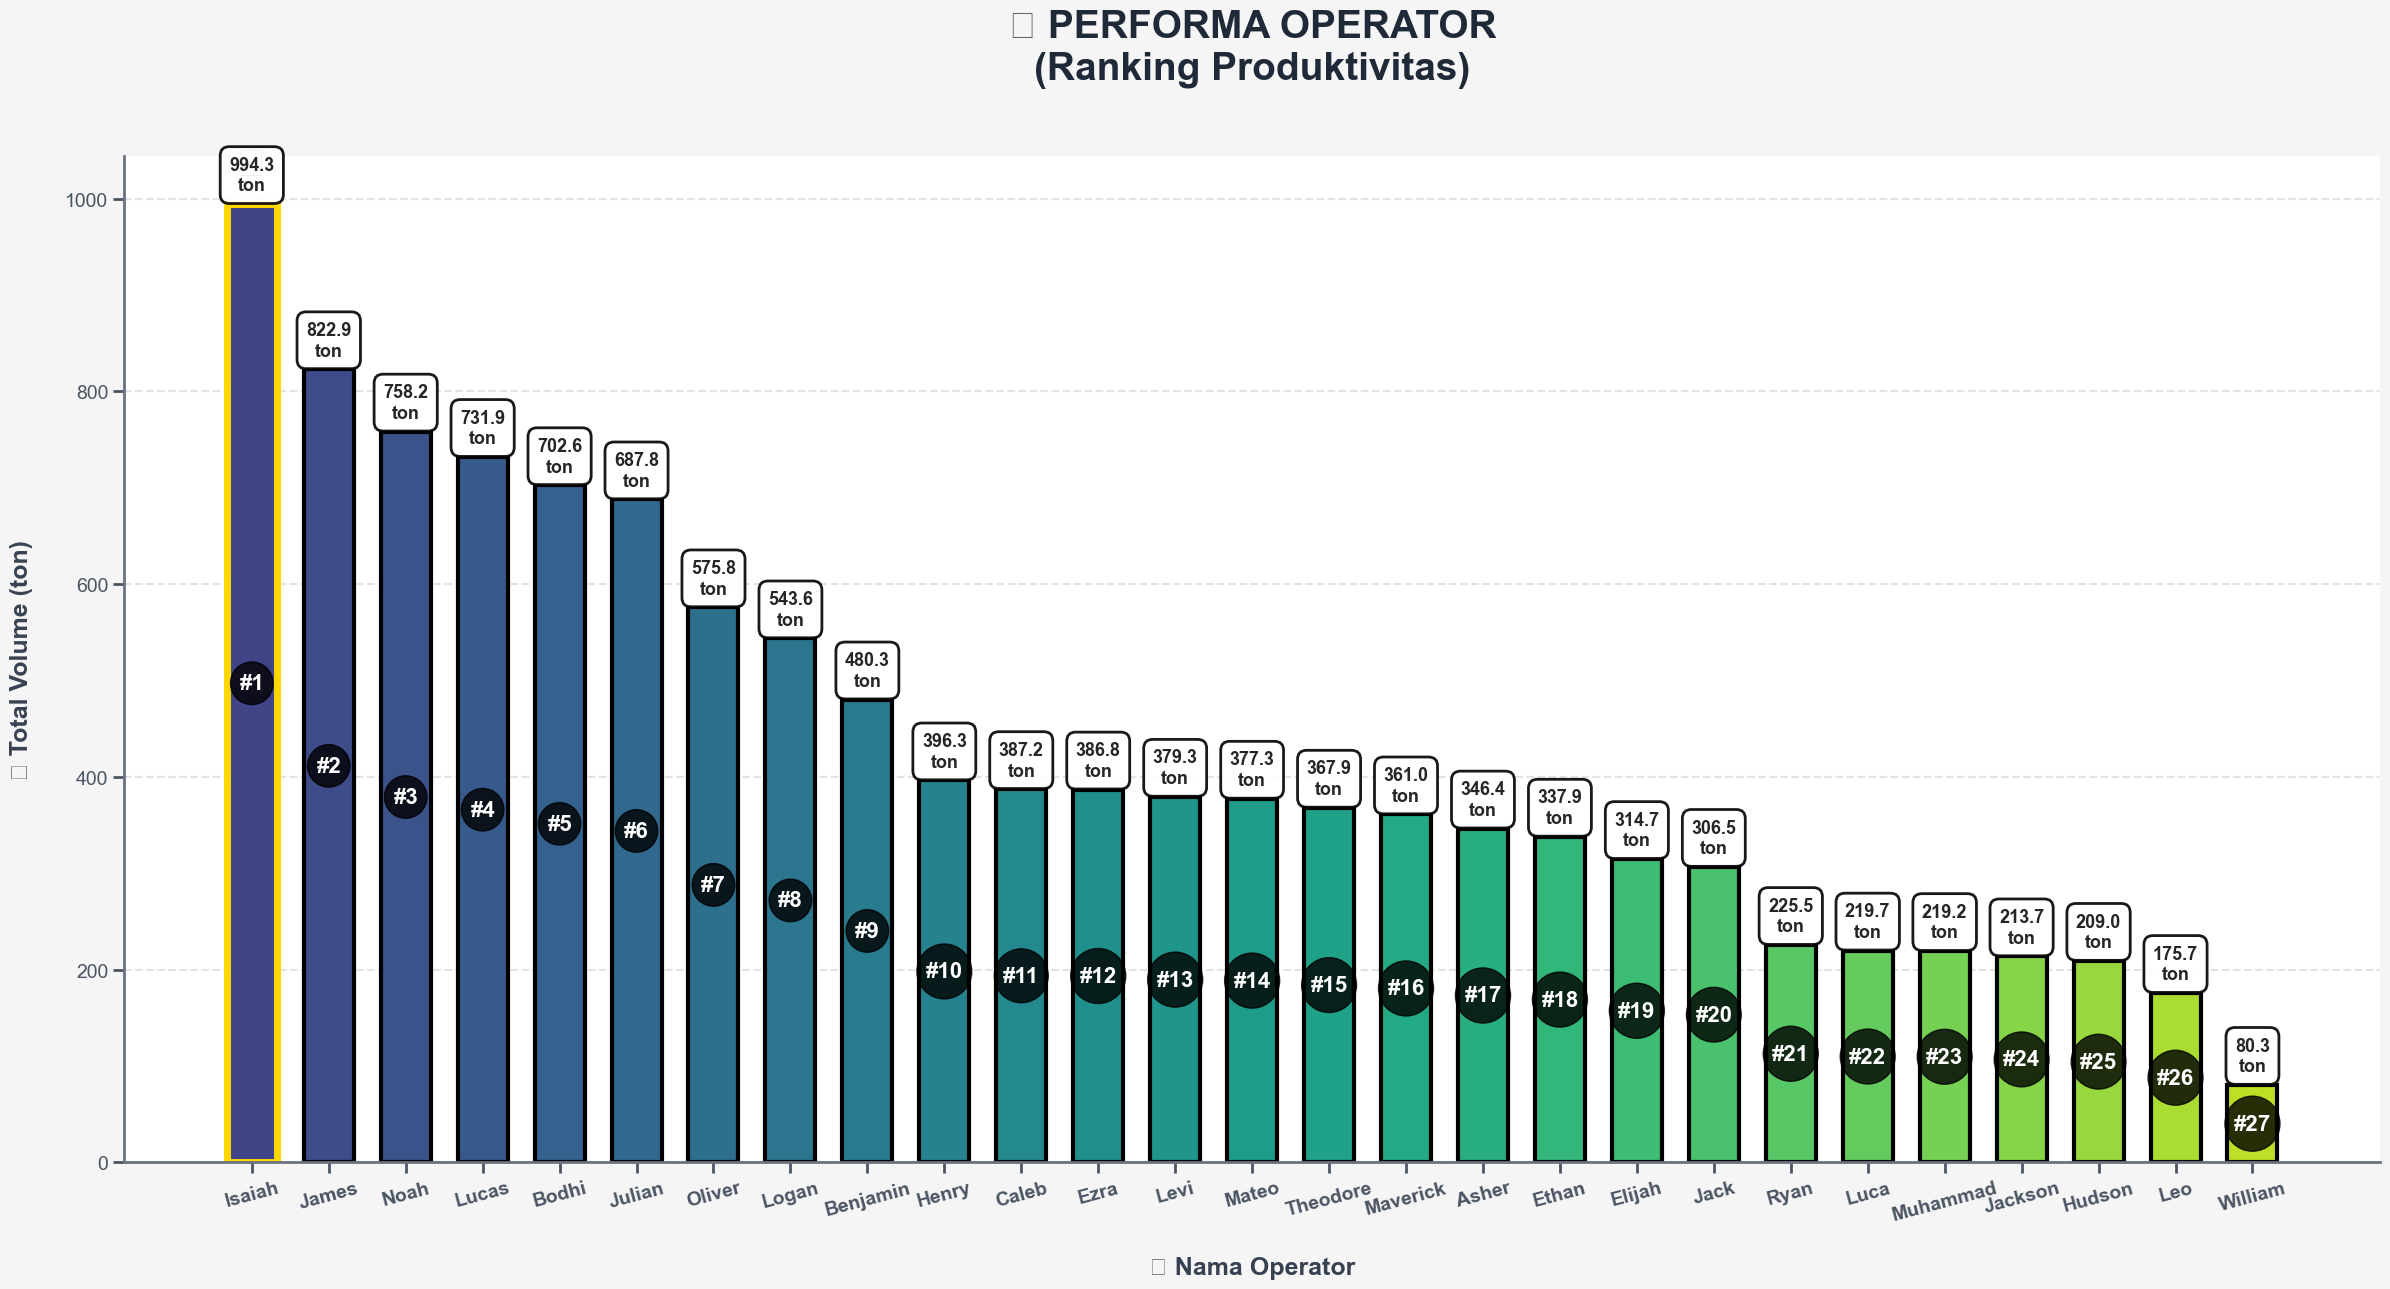

In [34]:
# ============= GRAFIK 1: TREND VOLUME HARIAN (ULTRA HD) =============
fig1 = plt.figure(figsize=(24, 13))
fig1.patch.set_facecolor('#F5F5F5')

daily_volume = df.groupby('date')['total_volume_ton'].sum().sort_index()

ax1 = plt.subplot(1, 1, 1)
ax1.set_facecolor('#FFFFFF')

# Plot line dengan gradient effect
ax1.plot(daily_volume.index, daily_volume.values, 
         marker='o', linewidth=5, markersize=15, 
         color='#1E3A8A', markerfacecolor='#DC2626', 
         markeredgecolor='white', markeredgewidth=3,
         label='Volume Harian', zorder=3)

# Fill area dengan gradient
ax1.fill_between(daily_volume.index, daily_volume.values, 
                 alpha=0.3, color='#3B82F6', zorder=1)

# Tambahkan garis mean dan max
mean_val = daily_volume.mean()
max_val = daily_volume.max()
min_val = daily_volume.min()

ax1.axhline(y=mean_val, color='#059669', linestyle='--', linewidth=3.5, 
            label=f'Rata-rata: {mean_val:.2f} ton', zorder=2)
ax1.axhline(y=max_val, color='#DC2626', linestyle=':', linewidth=3, 
            label=f'Maksimum: {max_val:.2f} ton', alpha=0.7, zorder=2)
ax1.axhline(y=min_val, color='#F59E0B', linestyle=':', linewidth=3, 
            label=f'Minimum: {min_val:.2f} ton', alpha=0.7, zorder=2)

# Anotasi untuk nilai tertinggi
max_idx = daily_volume.idxmax()
ax1.annotate(f'PUNCAK\n{max_val:.2f} ton', 
             xy=(max_idx, max_val), 
             xytext=(20, 40), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#FEE2E2', 
                      edgecolor='#DC2626', linewidth=3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                           color='#DC2626', linewidth=3),
             fontsize=14, fontweight='bold', ha='left')

# Anotasi untuk nilai terendah
min_idx = daily_volume.idxmin()
ax1.annotate(f'TERENDAH\n{min_val:.2f} ton', 
             xy=(min_idx, min_val), 
             xytext=(20, -60), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#FEF3C7', 
                      edgecolor='#F59E0B', linewidth=3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.3',
                           color='#F59E0B', linewidth=3),
             fontsize=14, fontweight='bold', ha='left')

# Title dan labels
ax1.set_title('📈 TREND VOLUME PRODUKSI HARIAN\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax1.set_xlabel('\n📅 Tanggal', fontsize=18, fontweight='bold', color='#374151')
ax1.set_ylabel('📦 Volume Produksi (ton)\n', fontsize=18, fontweight='bold', color='#374151')

# Styling
ax1.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, color='#9CA3AF')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('#6B7280')
ax1.spines['bottom'].set_color('#6B7280')

# Legend
legend = ax1.legend(loc='upper left', frameon=True, fontsize=14, 
                    fancybox=True, shadow=True, framealpha=0.95)
legend.get_frame().set_facecolor('#FFFFFF')
legend.get_frame().set_edgecolor('#1E3A8A')
legend.get_frame().set_linewidth(2)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('1_trend_volume_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("\n✅ Grafik 1 disimpan: '1_trend_volume_harian_HD.png'")

# ============= GRAFIK 2: TREND GRADE HARIAN (ULTRA HD) =============
fig2 = plt.figure(figsize=(24, 13))
fig2.patch.set_facecolor('#F5F5F5')

daily_grade = df.groupby('date')['average_grade_pct'].mean().sort_index()

ax2 = plt.subplot(1, 1, 1)
ax2.set_facecolor('#FFFFFF')

# Plot line dengan gradient effect
ax2.plot(daily_grade.index, daily_grade.values, 
         marker='D', linewidth=5, markersize=15, 
         color='#7C3AED', markerfacecolor='#F59E0B', 
         markeredgecolor='white', markeredgewidth=3,
         label='Grade Harian', zorder=3)

# Fill area dengan gradient
ax2.fill_between(daily_grade.index, daily_grade.values, 
                 alpha=0.3, color='#A78BFA', zorder=1)

# Tambahkan garis mean dan max
mean_grade = daily_grade.mean()
max_grade = daily_grade.max()
min_grade = daily_grade.min()

ax2.axhline(y=mean_grade, color='#059669', linestyle='--', linewidth=3.5, 
            label=f'Rata-rata: {mean_grade:.2f}%', zorder=2)
ax2.axhline(y=max_grade, color='#DC2626', linestyle=':', linewidth=3, 
            label=f'Maksimum: {max_grade:.2f}%', alpha=0.7, zorder=2)
ax2.axhline(y=min_grade, color='#F59E0B', linestyle=':', linewidth=3, 
            label=f'Minimum: {min_grade:.2f}%', alpha=0.7, zorder=2)

# Anotasi untuk nilai tertinggi
max_grade_idx = daily_grade.idxmax()
ax2.annotate(f'GRADE TERTINGGI\n{max_grade:.2f}%', 
             xy=(max_grade_idx, max_grade), 
             xytext=(20, 40), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#FEE2E2', 
                      edgecolor='#DC2626', linewidth=3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                           color='#DC2626', linewidth=3),
             fontsize=14, fontweight='bold', ha='left')

# Title dan labels
ax2.set_title('⚗️ TREND GRADE RATA-RATA HARIAN\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax2.set_xlabel('\n📅 Tanggal', fontsize=18, fontweight='bold', color='#374151')
ax2.set_ylabel('⚗️ Grade (%)\n', fontsize=18, fontweight='bold', color='#374151')

# Styling
ax2.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, color='#9CA3AF')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_color('#6B7280')
ax2.spines['bottom'].set_color('#6B7280')

# Legend
legend = ax2.legend(loc='upper left', frameon=True, fontsize=14, 
                    fancybox=True, shadow=True, framealpha=0.95)
legend.get_frame().set_facecolor('#FFFFFF')
legend.get_frame().set_edgecolor('#7C3AED')
legend.get_frame().set_linewidth(2)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('2_trend_grade_harian_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("✅ Grafik 2 disimpan: '2_trend_grade_harian_HD.png'")

# ============= GRAFIK 3: PERFORMA PIT (ULTRA HD) =============
fig3 = plt.figure(figsize=(24, 13))
fig3.patch.set_facecolor('#F5F5F5')

ax3 = plt.subplot(1, 1, 1)
ax3.set_facecolor('#FFFFFF')

pit_volume = df.groupby('pit_name')['total_volume_ton'].sum().sort_values(ascending=False)
colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(pit_volume)))

bars = ax3.bar(range(len(pit_volume)), pit_volume.values, 
               color=colors_gradient, edgecolor='black', linewidth=3, width=0.7)

# Gradient effect pada bars
for i, (bar, value) in enumerate(zip(bars, pit_volume.values)):
    # Tambahkan highlight pada bar tertinggi
    if value == pit_volume.max():
        bar.set_edgecolor('#DC2626')
        bar.set_linewidth(5)
        bar.set_alpha(1.0)
        # Crown emoji
        ax3.text(bar.get_x() + bar.get_width()/2, value + 30, '👑', 
                ha='center', fontsize=30)
    
    # Tambahkan nilai di atas bar dengan background
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 10, 
             f'{height:.1f}\nton', 
             ha='center', va='bottom', fontsize=13, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor='black', linewidth=2, alpha=0.9))
    
    # Tambahkan persentase
    percentage = (value / pit_volume.sum()) * 100
    ax3.text(bar.get_x() + bar.get_width()/2, height/2, 
             f'{percentage:.1f}%', 
             ha='center', va='center', fontsize=12, fontweight='bold',
             color='white',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='black', alpha=0.7))

# Title dan labels
ax3.set_title('🏗️ TOTAL VOLUME PRODUKSI PER PIT\n(Ranking Tertinggi ke Terendah)\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax3.set_xlabel('\n🏗️ Nama Pit', fontsize=18, fontweight='bold', color='#374151')
ax3.set_ylabel('📦 Total Volume (ton)\n', fontsize=18, fontweight='bold', color='#374151')

ax3.set_xticks(range(len(pit_volume)))
ax3.set_xticklabels(pit_volume.index, fontsize=15, fontweight='bold')

# Styling
ax3.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax3.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, axis='y', color='#9CA3AF')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_linewidth(2)
ax3.spines['left'].set_color('#6B7280')
ax3.spines['bottom'].set_color('#6B7280')

# Tambahkan info total
total_volume = pit_volume.sum()
ax3.text(0.98, 0.97, f'TOTAL PRODUKSI\n{total_volume:.2f} ton', 
         transform=ax3.transAxes, fontsize=16, fontweight='bold',
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=1', facecolor='#DBEAFE', 
                  edgecolor='#1E3A8A', linewidth=3))

plt.tight_layout()
plt.savefig('3_performa_pit_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("✅ Grafik 3 disimpan: '3_performa_pit_HD.png'")

# ============= GRAFIK 4: GRADE PER PIT (ULTRA HD) =============
fig4 = plt.figure(figsize=(24, 13))
fig4.patch.set_facecolor('#F5F5F5')

ax4 = plt.subplot(1, 1, 1)
ax4.set_facecolor('#FFFFFF')

pit_grade = df.groupby('pit_name')['average_grade_pct'].mean().sort_values(ascending=False)
colors_grade = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(pit_grade)))

bars = ax4.bar(range(len(pit_grade)), pit_grade.values, 
               color=colors_grade, edgecolor='black', linewidth=3, width=0.7)

# Highlight bar tertinggi
for i, (bar, value) in enumerate(zip(bars, pit_grade.values)):
    if value == pit_grade.max():
        bar.set_edgecolor('#DC2626')
        bar.set_linewidth(5)
        ax4.text(bar.get_x() + bar.get_width()/2, value + 0.1, '⭐', 
                ha='center', fontsize=30)
    
    # Tambahkan nilai
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 0.05, 
             f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=13, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor='black', linewidth=2, alpha=0.9))

# Title dan labels
ax4.set_title('⚗️ GRADE RATA-RATA PER PIT\n(Kualitas Tertinggi ke Terendah)\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax4.set_xlabel('\n🏗️ Nama Pit', fontsize=18, fontweight='bold', color='#374151')
ax4.set_ylabel('⚗️ Average Grade (%)\n', fontsize=18, fontweight='bold', color='#374151')

ax4.set_xticks(range(len(pit_grade)))
ax4.set_xticklabels(pit_grade.index, fontsize=15, fontweight='bold')

# Styling
ax4.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax4.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, axis='y', color='#9CA3AF')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_linewidth(2)
ax4.spines['bottom'].set_linewidth(2)
ax4.spines['left'].set_color('#6B7280')
ax4.spines['bottom'].set_color('#6B7280')

# Tambahkan info rata-rata
avg_grade = pit_grade.mean()
ax4.axhline(y=avg_grade, color='#059669', linestyle='--', linewidth=3.5, 
            label=f'Rata-rata: {avg_grade:.2f}%', zorder=2)
legend = ax4.legend(loc='upper right', fontsize=14, frameon=True, 
                    fancybox=True, shadow=True, framealpha=0.95)
legend.get_frame().set_facecolor('#FFFFFF')
legend.get_frame().set_edgecolor('#059669')
legend.get_frame().set_linewidth(2)

plt.tight_layout()
plt.savefig('4_grade_per_pit_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("✅ Grafik 4 disimpan: '4_grade_per_pit_HD.png'")

# ============= GRAFIK 5: PERFORMA OPERATOR (ULTRA HD) =============
fig5 = plt.figure(figsize=(24, 13))
fig5.patch.set_facecolor('#F5F5F5')

ax5 = plt.subplot(1, 1, 1)
ax5.set_facecolor('#FFFFFF')

operator_volume = df.groupby('operator_name')['total_volume_ton'].sum().sort_values(ascending=False)
colors_op = plt.cm.viridis(np.linspace(0.2, 0.9, len(operator_volume)))

bars = ax5.bar(range(len(operator_volume)), operator_volume.values, 
               color=colors_op, edgecolor='black', linewidth=3, width=0.65)

# Highlight operator terbaik
for i, (bar, value, name) in enumerate(zip(bars, operator_volume.values, operator_volume.index)):
    if i == 0:  # Operator terbaik
        bar.set_edgecolor('#FFD700')
        bar.set_linewidth(5)
        ax5.text(bar.get_x() + bar.get_width()/2, value + 30, '🏆', 
                ha='center', fontsize=30)
    
    # Tambahkan nilai
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2, height + 10, 
             f'{height:.1f}\nton', 
             ha='center', va='bottom', fontsize=13, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor='black', linewidth=2, alpha=0.9))
    
    # Ranking
    ax5.text(bar.get_x() + bar.get_width()/2, height/2, 
             f'#{i+1}', 
             ha='center', va='center', fontsize=16, fontweight='bold',
             color='white',
             bbox=dict(boxstyle='circle,pad=0.4', facecolor='black', alpha=0.8))

# Title dan labels
ax5.set_title('👷 PERFORMA OPERATOR\n(Ranking Produktivitas)\n', 
              fontsize=28, fontweight='bold', pad=25, color='#1F2937')
ax5.set_xlabel('\n👷 Nama Operator', fontsize=18, fontweight='bold', color='#374151')
ax5.set_ylabel('📦 Total Volume (ton)\n', fontsize=18, fontweight='bold', color='#374151')

ax5.set_xticks(range(len(operator_volume)))
ax5.set_xticklabels(operator_volume.index, fontsize=15, fontweight='bold', rotation=15)

# Styling
ax5.tick_params(axis='both', which='major', labelsize=14, width=2, length=8, colors='#4B5563')
ax5.grid(True, alpha=0.3, linestyle='--', linewidth=1.5, axis='y', color='#9CA3AF')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_linewidth(2)
ax5.spines['bottom'].set_linewidth(2)
ax5.spines['left'].set_color('#6B7280')
ax5.spines['bottom'].set_color('#6B7280')

plt.tight_layout()
plt.savefig('5_performa_operator_HD.png', dpi=300, bbox_inches='tight', facecolor='#F5F5F5')
print("✅ Grafik 5 disimpan: '5_performa_operator_HD.png'")

# Tampilkan semua grafik
plt.show()

### RINGKASAN AKHIR

In [35]:
print("\n" + "="*70)
print(" "*25 + "💡 RINGKASAN")
print("="*70)

print(f"\n🏆 PIT TERBAIK (Volume)  : {pit_volume.idxmax()} ({pit_volume.max():.2f} ton)")
print(f"⭐ PIT TERBAIK (Grade)   : {pit_grade.idxmax()} ({pit_grade.max():.2f}%)")
print(f"👑 OPERATOR TERBAIK      : {operator_volume.idxmax()} ({operator_volume.max():.2f} ton)")
print(f"\n📊 Total Produksi        : {df['total_volume_ton'].sum():.2f} ton")
print(f"📊 Rata-rata Harian      : {daily_volume.mean():.2f} ton/hari")
print(f"⚗️ Rata-rata Grade       : {df['average_grade_pct'].mean():.2f}%")

correlation = df['total_volume_ton'].corr(df['average_grade_pct'])
print(f"\n🔗 Korelasi Volume-Grade : {correlation:.3f}")
if abs(correlation) < 0.3:
    print("   → Korelasi LEMAH - Volume dan Grade tidak saling mempengaruhi")
elif correlation > 0.3:
    print("   → Korelasi POSITIF - Volume tinggi cenderung grade tinggi")
else:
    print("   → Korelasi NEGATIF - Volume tinggi cenderung grade rendah")

print("\n" + "="*70)
print(" "*22 + "ANALISIS SELESAI!")
print("="*70)
print("\n📁 File yang dihasilkan:")
print("   1. 1_trend_volume_harian_HD.png")
print("   2. 2_trend_grade_harian_HD.png")
print("   3. 3_performa_pit_HD.png")
print("   4. 4_grade_per_pit_HD.png")
print("   5. 5_performa_operator_HD.png")
print("\n✨ Semua grafik disimpan dalam resolusi Ultra HD (300 DPI)")
print("="*70)


                         💡 RINGKASAN

🏆 PIT TERBAIK (Volume)  : Pit 4 (1946.14 ton)
⭐ PIT TERBAIK (Grade)   : Pit 3 (2.23%)
👑 OPERATOR TERBAIK      : Isaiah (994.27 ton)

📊 Total Produksi        : 12048.03 ton
📊 Rata-rata Harian      : 388.65 ton/hari
⚗️ Rata-rata Grade       : 1.76%

🔗 Korelasi Volume-Grade : -0.146
   → Korelasi LEMAH - Volume dan Grade tidak saling mempengaruhi

                      ANALISIS SELESAI!

📁 File yang dihasilkan:
   1. 1_trend_volume_harian_HD.png
   2. 2_trend_grade_harian_HD.png
   3. 3_performa_pit_HD.png
   4. 4_grade_per_pit_HD.png
   5. 5_performa_operator_HD.png

✨ Semua grafik disimpan dalam resolusi Ultra HD (300 DPI)
